# Keisha Kwek

## Research question/interests

What are the data analysis processes which are most accurate in displaying the abstract of the examined datasets? 

### Analysis Plan
I am interested in exploring how we can create appropriate abstracts/data summaries of the datasets used using the most suitable models and formulas for the clients' background information. This background information is aimed to help clients make decisions and be mindful of how each variable influences their portfolio creation process, having autonomy over the direction in which the portfolio calculataions and analyses will head. To do this, there will be computation of relevant variables which are best fit to be analyzed together, having backend-research to back up the relevance of each paired/grouped variable that is explored. 

## Stage 1 Analysis
Starting this analysis with the original research question, I realized that there needs to be more specifity in the variables framed in the research question to result in a thorough and exhaustive analysis. 

This is because the different types of investment companies have varying methods of data processing and hence require separate analyses. 
For this reason, our group will be diverge our analyses into three: Growth, Value, and GARP stocks. More information on this decree can be viewed under the "Project Analysis Stages and Division" issue. 

**This analysis will focus on Value Stocks.**

### Value Companies

Classified as companies that trade below their true worth, value companies sell value stocks.

Value stocks are most often characterized by its high dividend yield, low price-to-book ratio, and low price-to earnings ratio[^1].



#### Calculating the best Dividend Stock Portfolio
There are many factors which indicate a good dividend to invest on - of course, considering the varying definitions of a "good investment" from different clients. 

This first analysis will look into the fundamentals of a good Dividend Stock Portfolio, looking into its earnings momentum and company intrinsic value. 

##### I. Earnings Momentum
Earnings Momentum allows us to view a company's revenues, increased sales, and overall market expansion by its earnings per share (EPS) growth direction in comparison to the prior fiscal year. 

EPS is calculated by dividing total earnings by the number of outstanding shares; meaning the higher the EPS, the more profitable the company is[^2]. 

To accomodate for the potential dilution incurred from stock-based compensation, warrants, and other dilutive instruments[^3], it is given credence that Diluted EPS is more scientific than basic EPS[^4]. For this reason, this analysis will be using the Diluted EPS values to calculate a company's earnings momentum. 

[^1]: https://www.investopedia.com/terms/v/valuestock.as
[^2]: https://www.investopedia.com/terms/e/eps.asp
[^3]: https://www.indiainfoline.com/knowledge-center/online-share-trading/basic-eps-vs-diluted-eps
[^4]: https://www.angelone.in/knowledge-center/online-share-trading/basic-eps-vs-diluted-eps

Initially, I attempted to do a FacetGrid to visualize the differing earnings momentum between different sectors of the S&P500. However, the results were difficult to read and the graph scales were varying between sectors, which led me to believe there were extreme outliers in the data set. 

<seaborn.axisgrid.FacetGrid>

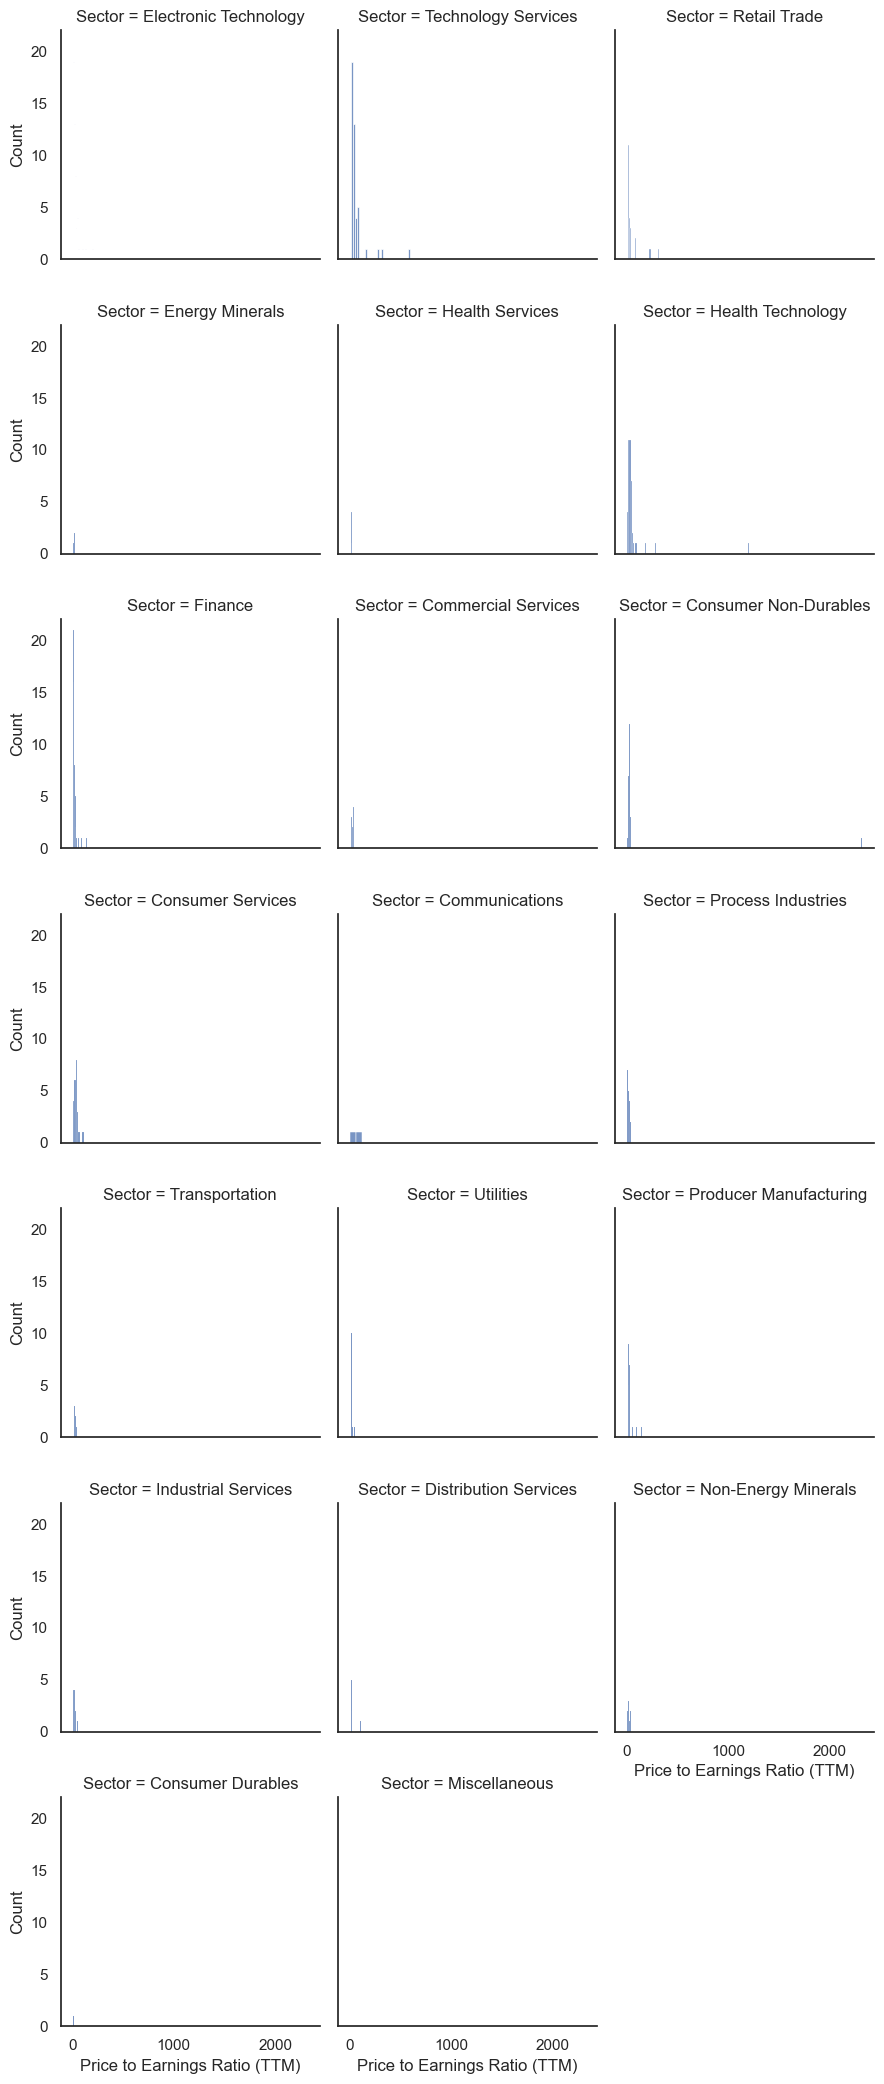

In [ ]:
k = sns.FacetGrid(sector_df, col="Sector", col_wrap=3)
k.map(sns.histplot, "Price to Earnings Ratio (TTM)")

<seaborn.axisgrid.FacetGrid>

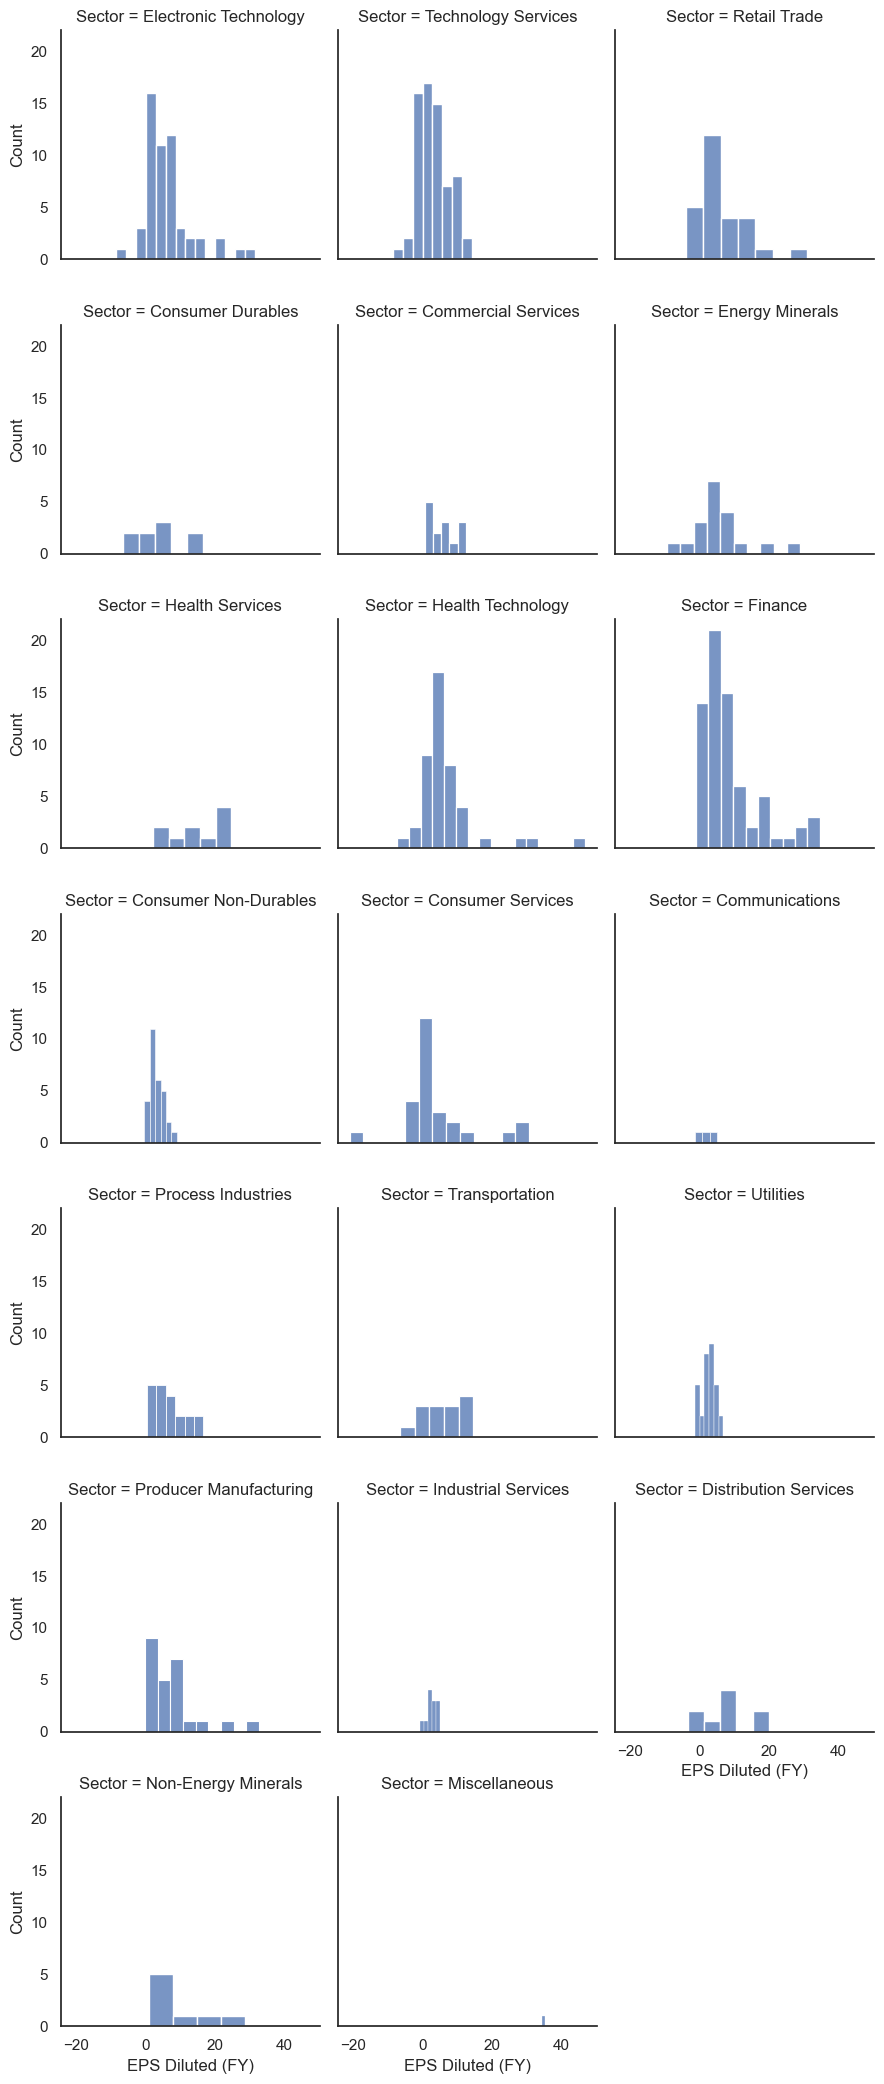

In [ ]:
#Fixing the Facetplot by removing outliers. 
y = sns.FacetGrid(new_df, col="Sector", col_wrap=3)
y.map(sns.histplot, "EPS Diluted (FY)")

#But I decided to go for a KDE plot as it better visualizes the different 
#EPS values between the industries. 

/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


<seaborn.axisgrid.FacetGrid>

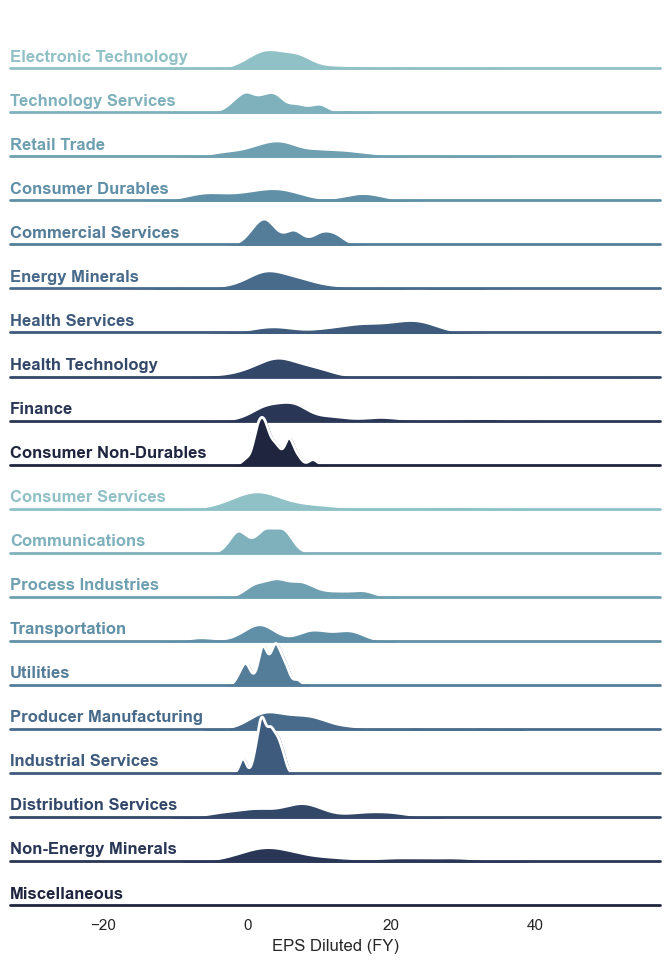

In [ ]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(new_df, row="Sector", hue="Sector", aspect=15, height=.5, palette=pal)
g.map(sns.kdeplot, "EPS Diluted (FY)", bw_adjust=.5, clip_on=False,fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "EPS Diluted (FY)", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "EPS Diluted (FY)")

g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

#### Data Cleaning Process
Looking at the valuation_df dataframe, I noticed that BRK.A had a very high EPS value compared to the other displayed values. I first ran a zscore test which resulted in BRK.A being an outstanding outlier, while others had a zscore value of around -0.4. After removing BRK.A, I ran another zscore test to see five outliers (zscore > 3 | < -3) and removed them alongside the null values. 

#### Plotting
Next, I realized that a better way to visualize this would be a stacked KDE plot between the different sectors. 

#### Analysis
I realized that the Health Services sector shows a higher percentage of its Value Stocks having a high EPS value in comparison to other sectors. However, this may need to be taken with caution as it may be because we had a Pandemic recently and not necessarily because it is a more profitable industry. Nonetheless, more background research is required to infer the meaning of the EPS values seen on the plot. 

I hope to find a way to quantify the trivial changes of world events when analysing my plots in the future. 

##### II. Intrinsic value of the company
It is recommended that instead of viewing the market value of previous years, the intrinsic value of a company should be of concern[^5]. The intrinsic value of a company is seen from its book value and price-to-earnings (PE) ratio[^6]. 

The Book Value of a company reflects the total value of a company's assets that the shareholders of such company would receive if the company were to be liquidated tomorrow[^7]. 

A high PE ratio means that the stock is expensive and its price may fall in the future, and a low PE ratio means that a stock is cheap and its price may rise in the future[^8]. 

[^5]: https://www.investopedia.com/terms/i/intrinsicvalue.asp
[^6]: https://www.fool.com/investing/how-to-invest/stocks/intrinsic-value/
[^7]: https://www.investopedia.com/terms/b/bookvalue.asp
[^8]: https://www.chase.com/personal/investments/learning-and-insights/article/what-is-a-p-e-ratio

In [ ]:
insval_df

,level_0,index,Ticker,Description,Total Debt (MRQ),Price,Assets (TATC),Book Value of Equity
0,0,524,DPZ,Domino's Pizza Inc,5.384150e+09,348.49,2.472807e+09,0.459275
1,1,238,YUM,"Yum! Brands, Inc.",1.158900e+10,129.04,7.374000e+09,0.636293
2,2,189,LVS,Las Vegas Sands Corp.,1.595000e+10,57.88,1.262000e+10,0.791223
3,3,445,FICO,Fair Isaac Corporation,1.971426e+09,644.28,1.942515e+09,0.985335
4,4,338,SIRI,Sirius XM Holdings Inc.,1.015900e+10,5.87,1.109100e+10,1.091741
...,...,...,...,...,...,...,...,...
492,492,389,INCY,Incyte Corporation,4.208000e+07,83.65,9.331325e+09,221.752020
493,493,229,ANET,"Arista Networks, Inc.",4.706700e+07,123.84,1.119369e+10,237.824548
494,494,420,TW,Tradeweb Markets Inc.,2.866800e+07,74.38,7.424099e+09,258.968153
495,495,149,MNST,Monster Beverage Corporation,4.355800e+07,102.37,1.290150e+10,296.191193


The above dataframe is processed from the balance_sheet_df and frames the Price and Book value of Equity of the separate stocks. 

I tried to visualize the companies with the best and worst book values alongside their respective prices with the following graph below. 

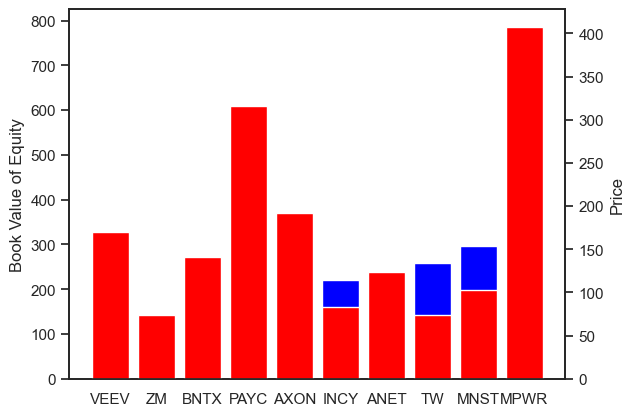

In [ ]:
fig, ax1 = plt.subplots()

x = insval_df_top['Ticker']
y1 = insval_df_top['Book Value of Equity']
y2 = insval_df_top['Price']

ax1.bar(x, y1, color='blue') 
ax1.set_ylabel('Book Value of Equity')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='red')
ax2.set_ylabel('Price')


plt.show()

However, I faced issues in trying to visualize the variables from the dual-axis plot: the plots overallaped and I was not able to separate them side-by-side, whilst already trying the position function. 

After consultation with Professor Moosvi, I have decided to visualize the barplot by separating them into two different graphs but having them side-by-side and having the y-axis as the Ticker values instead of having two Y-Axis. This way the range of each plot can be better visualizes. 

Additionally, I noticed that only showing the top and bottom book values would not be valuable to the algorithm. This is where I noticed the first need for the ranking algorithm to rate the varying values of book value and price. I hope to apply a ranking to all the values by comparing their book values compared to their price. In this case, I need to do more research on the bounds and formulas used to determine a fair price range for a given book value of a company. 

This plot made me realize that it may be more efficient to have two different plots to represent "best" stocks to be chosen: an overall summary of "best" and "worst" stocks alongside the strongest industries to invest in and the strongest stocks in respect to that industry. 

In the next analysis, I hope to focus more on how to rank values of a stock in respect to its fair price range, and to visualize it more effectively using two separate barplots side-by-side instead of a dual-y-axis plot. 

### Revised Analysis Plan

As mentioned previously, I hope to focus more deeply into which value stocks provide the best dividend for clients by ranking scores of various variables that indicate a good dividend yield and aggregating them to finalize a score to be applied in the bigger project portfolio algorithm. 

As we are not allowed to use APIs, we may not be able to compare multiple datasets from past economic cycles. However, I hope to integrate the factor of pool companies, bear, and bull markets as added labels to these stocks to allow a better combination of balanced and high growth industries into the portfolio mix produced. 

Additionally, I hope to focus on the financial stability of companies in the next analysis plan as that is integral to a value company. This will be done by assessing the company's credit ratings and ability to reliably pay back debts. 

So, after categorizing the S&P 500 stocks into value stocks, cleaning, and planning the use of the data before executing the calculations, we will have a good assessment of the value of a value stock to apply its ranking to the combination-process of the overall portfolio algorithm of our project. 

Overall, my research question will change to:

### What are the best metrics to use to rank the value of a value stock for a dividend stock portfolio calculation and how can it be best enumerated to yield the most accurate results? 

 -- where I will be focusing strictly on the valuation of a value stock (hence its dividend portfolio) in the top 500 stocks present in our datasets and how its "advantageous" variables can be best adjusted and translated to varying clients. 

# Raw Analysis 
This section is very messy, but it includes my trial and error in the process of my data analysis. 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

balance_sheet_df = pd.read_csv("../data/raw/us_equities_tradingview_data_balance_sheet.csv")
dividends_df = pd.read_csv("../data/raw/us_equities_tradingview_data_dividends.csv")
income_statement_df = pd.read_csv("../data/raw/us_equities_tradingview_data_income_statement.csv")
margins_df = pd.read_csv("../data/raw/us_equities_tradingview_data_margins.csv")
overview_df = pd.read_csv("../data/raw/us_equities_tradingview_data_overview.csv")
performance_df = pd.read_csv("../data/raw/us_equities_tradingview_data_performance.csv")
valuation_df = pd.read_csv("../data/raw/us_equities_tradingview_data_valuation.csv")

In [ ]:
balance_sheet_df.head(500)

,Ticker,Description,Current Ratio (MRQ),Debt to Equity Ratio (MRQ),Net Debt (MRQ),Quick Ratio (MRQ),Total Assets (MRQ),Total Debt (MRQ),Total Current Assets (MRQ)
0,AAPL,Apple Inc.,0.879356,2.614462,8.417600e+10,0.847235,3.527550e+11,1.324800e+11,1.354050e+11
1,MSFT,Microsoft Corporation,1.931313,0.425831,-2.152300e+10,1.894846,3.645520e+11,7.798500e+10,1.578230e+11
2,GOOG,Alphabet Inc.,2.517604,0.115666,-8.692300e+10,2.469771,3.582550e+11,2.933600e+10,1.661090e+11
3,AMZN,"Amazon.com, Inc.",0.936593,1.051575,8.568700e+10,0.675506,4.283620e+11,1.445800e+11,1.314630e+11
4,BRK.A,Berkshire Hathaway Inc.,4.047764,0.264500,1.370300e+10,3.543566,9.022960e+11,1.226610e+11,2.015220e+11
...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",2.794055,0.013247,-3.629070e+08,2.393043,2.010430e+09,1.631100e+07,1.205699e+09
496,RE,"Everest Re Group, Ltd.",0.393776,0.403190,1.405000e+09,NaN,3.534800e+10,3.084000e+09,7.744000e+09
497,NDSN,Nordson Corporation,1.358148,0.375028,6.969970e+08,0.898550,3.820375e+09,8.604540e+08,1.132971e+09
498,U,Unity Software Inc.,3.392928,0.822193,1.249300e+08,3.392928,4.727161e+09,1.811033e+09,2.075600e+09


In [ ]:
dividends_df.head(500)

,Ticker,Description,Price,Dividend Yield Forward,Dividends Paid (FY),Dividends per Share (FY)
0,AAPL,Apple Inc.,143.00,0.630439,-1.484100e+10,0.90
1,MSFT,Microsoft Corporation,242.71,1.096067,-1.813500e+10,2.48
2,GOOG,Alphabet Inc.,97.95,NaN,0.000000e+00,0.00
3,AMZN,"Amazon.com, Inc.",100.55,NaN,0.000000e+00,0.00
4,BRK.A,Berkshire Hathaway Inc.,465039.98,NaN,0.000000e+00,0.00
...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",191.46,NaN,0.000000e+00,0.00
496,RE,"Everest Re Group, Ltd.",346.92,1.880396,-2.466990e+08,6.20
497,NDSN,Nordson Corporation,235.97,1.085233,-1.259140e+08,2.18
498,U,Unity Software Inc.,33.43,NaN,0.000000e+00,0.00


In [ ]:
income_statement_df.head(500)

,Ticker,Description,Basic EPS (FY),Basic EPS (TTM),EPS Diluted (TTM),EBITDA (TTM),Gross Profit (MRQ),Gross Profit (FY),Total Revenue (FY),EPS Diluted (FY),Last Year Revenue (FY),Net Income (FY)
0,AAPL,Apple Inc.,6.1546,6.1445,6.1021,1.305410e+11,3.809500e+10,1.707820e+11,3.943280e+11,6.1132,3.943280e+11,9.980300e+10
1,MSFT,Microsoft Corporation,9.7036,9.0309,8.9940,9.700500e+10,3.525900e+10,1.356200e+11,1.982700e+11,9.6470,1.982700e+11,7.273800e+10
2,GOOG,Alphabet Inc.,5.6941,5.0893,4.9694,9.223800e+10,3.729600e+10,1.465490e+11,2.574880e+11,5.6099,2.574880e+11,7.603300e+10
3,AMZN,"Amazon.com, Inc.",3.2968,1.1147,1.0890,5.207700e+10,5.683300e+10,1.974780e+11,4.698220e+11,3.2392,4.698220e+11,3.336400e+10
4,BRK.A,Berkshire Hathaway Inc.,59460.0000,-1194.0000,-1194.0000,5.330500e+10,1.406700e+10,5.516400e+10,2.760940e+11,59460.0000,2.760940e+11,8.979500e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",-0.9067,1.4665,1.4358,7.367400e+07,1.932570e+08,5.310860e+08,8.633810e+08,-0.9067,8.633810e+08,-6.001800e+07
496,RE,"Everest Re Group, Ltd.",34.6608,13.2847,13.2820,NaN,NaN,NaN,1.186626e+10,34.6246,1.186626e+10,1.360887e+09
497,NDSN,Nordson Corporation,8.9036,8.9088,8.8141,8.022830e+08,3.631830e+08,1.426536e+09,2.590278e+09,8.8088,2.590278e+09,5.131030e+08
498,U,Unity Software Inc.,-1.8203,-2.6874,-2.6874,-5.728910e+08,2.109780e+08,8.568960e+08,1.110526e+09,-1.8203,1.110526e+09,-5.326070e+08


In [ ]:
margins_df.head(500)

,Ticker,Description,Gross Margin (TTM),Operating Margin (TTM),Pretax Margin (TTM),Net Margin (TTM)
0,AAPL,Apple Inc.,43.309631,30.288744,30.204043,25.309641
1,MSFT,Microsoft Corporation,68.159770,40.576891,40.465668,33.048007
2,GOOG,Alphabet Inc.,55.865625,27.465095,28.003549,23.872310
3,AMZN,"Amazon.com, Inc.",43.044380,2.688021,1.983309,2.254720
4,BRK.A,Berkshire Hathaway Inc.,19.618425,14.357741,-1.296488,-0.452114
...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",61.418500,4.083179,11.627531,9.749751
496,RE,"Everest Re Group, Ltd.",NaN,5.173242,4.361120,4.369037
497,NDSN,Nordson Corporation,55.072699,27.115236,25.065997,19.808800
498,U,Unity Software Inc.,70.043649,-57.793288,-60.282472,-63.172080


In [ ]:
overview_df.head(500)

,Ticker,Description,Price,Change %,Change,Technical Rating,Volume,Volume*Price,Market Capitalization,Price to Earnings Ratio (TTM),Basic EPS (TTM),Number of Employees,Sector,Free Cash Flow (Annual YoY Growth),Free Cash Flow Margin (FY),Free Cash Flow (Quarterly YoY Growth)
0,AAPL,Apple Inc.,143.00,10.059263,13.07,Neutral,1377778266,1.970223e+11,2.264578e+12,23.914718,6.1445,164000.0,Electronic Technology,19.891773,28.261498,22.742534
1,MSFT,Microsoft Corporation,242.71,1.205070,2.89,Neutral,639626996,1.552439e+11,1.806686e+12,27.591728,9.0309,221000.0,Technology Services,16.092876,32.858728,-43.134068
2,GOOG,Alphabet Inc.,97.95,10.391074,9.22,Neutral,503871113,4.935418e+10,1.258830e+12,20.266028,5.0893,156500.0,Technology Services,56.412950,26.025291,-14.118590
3,AMZN,"Amazon.com, Inc.",100.55,19.702381,16.55,Neutral,1457271131,1.465286e+11,1.025776e+12,93.884298,1.1147,1608000.0,Retail Trade,-156.804505,-3.134379,41.031417
4,BRK.A,Berkshire Hathaway Inc.,465039.98,-0.783208,-3670.98,Buy,79667,3.704834e+10,6.758335e+11,NaN,-1194.0000,372000.0,Finance,-2.301857,9.469601,-10.582135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",191.46,15.386006,25.53,Buy,12251368,2.345647e+09,1.362532e+10,133.451734,1.4665,2148.0,Electronic Technology,318.484245,8.641376,566.750440
496,RE,"Everest Re Group, Ltd.",346.92,4.724243,15.65,Buy,4949097,1.716941e+09,1.358713e+10,26.425990,13.2847,1947.0,Finance,28.493374,34.472310,-8.640194
497,NDSN,Nordson Corporation,235.97,-0.736160,-1.75,Buy,4521456,1.066928e+09,1.348730e+10,27.181448,8.9088,7331.0,Producer Manufacturing,-9.046263,17.824457,0.713925
498,U,Unity Software Inc.,33.43,16.928996,4.84,Sell,200104490,6.689493e+09,1.347360e+10,NaN,-2.6874,5245.0,Technology Services,-657.728598,-13.812103,-336.115739


In [ ]:
performance_df.head(500)

,Ticker,Description,"Change 1m, %","Change 5m, %","Change 15m, %","Change 1h, %","Change 4h, %",Change %,"Change 1W, %","Change 1M, %",3-Month Performance,6-Month Performance,YTD Performance,Yearly Performance,1-Year Beta,Volatility
0,AAPL,Apple Inc.,0.104983,-0.062884,-0.247585,-0.017476,-0.325998,10.059263,-2.007812,10.059263,-7.789528,-11.091768,9.763586,-13.704665,1.215394,2.156108
1,MSFT,Microsoft Corporation,0.086580,-0.123426,-0.168606,0.156779,-0.210464,1.205070,-2.196164,1.205070,3.456948,-12.303078,-0.152213,-19.158645,1.152982,2.460776
2,GOOG,Alphabet Inc.,0.091949,-0.061206,-0.152874,-0.045911,-0.734586,10.391074,-2.740542,10.391074,2.468878,-15.807117,9.039296,-24.653846,1.169614,3.271124
3,AMZN,"Amazon.com, Inc.",0.084615,-0.039769,-0.153930,-0.153930,-0.725747,19.702381,-1.652973,19.702381,-3.308010,-26.180163,17.657384,-28.617320,1.528741,3.262297
4,BRK.A,Berkshire Hathaway Inc.,0.030108,-0.090214,-0.354543,-0.209174,-0.570213,-0.783208,-1.055323,-0.783208,3.309820,4.747166,-1.672485,0.536192,0.863212,1.089998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",0.330033,-0.005221,-0.200620,-0.036536,-1.135660,15.386006,-0.078284,15.386006,30.094449,67.447962,14.045747,47.594820,1.616774,4.558630
496,RE,"Everest Re Group, Ltd.",0.005766,-0.079208,-0.336130,-0.201375,-0.516188,4.724243,-1.159577,4.724243,7.072422,38.568461,4.876205,24.518144,0.621432,1.907056
497,NDSN,Nordson Corporation,0.046648,-0.038134,-0.139683,-0.217819,-1.185340,-0.736160,-1.506804,-0.736160,4.541024,3.223972,-1.122983,5.376680,0.981866,2.364478
498,U,Unity Software Inc.,0.134791,-0.313106,-0.948148,-1.003000,-2.137002,16.928996,-7.880959,16.928996,8.082768,-19.735894,12.558923,-64.049898,2.946093,8.717795


In [ ]:
valuation_df.head(500)

,Ticker,Description,Price,Market Capitalization,Price to Earnings Ratio (TTM),Price to Revenue Ratio (TTM),Basic EPS (TTM),EPS Diluted (FY),Enterprise Value/EBITDA (TTM),Enterprise Value (MRQ),Total Shares Outstanding
0,AAPL,Apple Inc.,143.00,2.264578e+12,23.914718,5.965003,6.1445,6.1132,18.347909,2.508880e+12,1.583620e+10
1,MSFT,Microsoft Corporation,242.71,1.806686e+12,27.591728,9.086498,9.0309,9.6470,18.821003,1.770650e+12,7.443800e+09
2,GOOG,Alphabet Inc.,97.95,1.258830e+12,20.266028,5.017950,5.0893,5.6099,13.089813,1.257450e+12,1.294300e+10
3,AMZN,"Amazon.com, Inc.",100.55,1.025776e+12,93.884298,2.103266,1.1147,3.2392,21.673755,1.253090e+12,1.020170e+10
4,BRK.A,Berkshire Hathaway Inc.,465039.98,6.758335e+11,NaN,2.331462,-1194.0000,59460.0000,13.226936,6.182900e+11,1.464813e+06
...,...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",191.46,1.362532e+10,133.451734,12.970778,1.4665,-0.9067,180.159705,8.031860e+09,7.116540e+07
496,RE,"Everest Re Group, Ltd.",346.92,1.358713e+10,26.425990,1.142070,13.2847,34.6246,NaN,1.326670e+10,3.916500e+07
497,NDSN,Nordson Corporation,235.97,1.348730e+10,27.181448,5.348165,8.9088,8.8088,17.937099,1.370720e+10,5.715680e+07
498,U,Unity Software Inc.,33.43,1.347360e+10,NaN,8.641483,-2.6874,-1.8203,NaN,9.653050e+09,4.030390e+08


In [ ]:
# Step 1: Dividing each ticker based on their industry
# Dataset used: overview_df. 

sector_df = overview_df.head(500)
sector_df = sector_df[['Ticker', 'Description', 'Sector']]
sector_df

,Ticker,Description,Sector
0,AAPL,Apple Inc.,Electronic Technology
1,MSFT,Microsoft Corporation,Technology Services
2,GOOG,Alphabet Inc.,Technology Services
3,AMZN,"Amazon.com, Inc.",Retail Trade
4,BRK.A,Berkshire Hathaway Inc.,Finance
...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology
496,RE,"Everest Re Group, Ltd.",Finance
497,NDSN,Nordson Corporation,Producer Manufacturing
498,U,Unity Software Inc.,Technology Services


In [ ]:
pie_slices = sector_df['Sector'].value_counts()
pie_slices

Finance                   72
Technology Services       68
Electronic Technology     54
Health Technology         47
Utilities                 31
Consumer Non-Durables     29
Retail Trade              28
Consumer Services         26
Producer Manufacturing    25
Process Industries        20
Energy Minerals           19
Commercial Services       14
Transportation            14
Industrial Services       12
Health Services           10
Consumer Durables         10
Distribution Services      9
Non-Energy Minerals        8
Communications             3
Miscellaneous              1
Name: Sector, dtype: int64

In [ ]:
label = pie_slices.keys()
slices = pie_slices.tolist()

Text(0.5, 1.0, 'Sectors of top 500 companies')

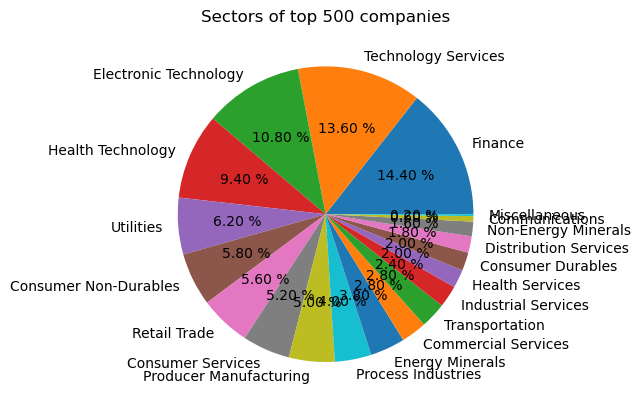

In [ ]:
plt.pie(slices, labels = label, autopct='%.2f %%')
plt.title('Sectors of top 500 companies')
#decrease text size, increasing graph

In [ ]:
over = valuation_df.head(500)
beps = over[['Ticker', 'Description','Basic EPS (TTM)']]
deps = over[['Ticker', 'Description','EPS Diluted (FY)']]

In [ ]:
beps

,Ticker,Description,Basic EPS (TTM)
0,AAPL,Apple Inc.,6.1445
1,MSFT,Microsoft Corporation,9.0309
2,GOOG,Alphabet Inc.,5.0893
3,AMZN,"Amazon.com, Inc.",1.1147
4,BRK.A,Berkshire Hathaway Inc.,-1194.0000
...,...,...,...
495,AXON,"Axon Enterprise, Inc.",1.4665
496,RE,"Everest Re Group, Ltd.",13.2847
497,NDSN,Nordson Corporation,8.9088
498,U,Unity Software Inc.,-2.6874


In [ ]:
deps

,Ticker,Description,EPS Diluted (FY)
0,AAPL,Apple Inc.,6.1132
1,MSFT,Microsoft Corporation,9.6470
2,GOOG,Alphabet Inc.,5.6099
3,AMZN,"Amazon.com, Inc.",3.2392
4,BRK.A,Berkshire Hathaway Inc.,59460.0000
...,...,...,...
495,AXON,"Axon Enterprise, Inc.",-0.9067
496,RE,"Everest Re Group, Ltd.",34.6246
497,NDSN,Nordson Corporation,8.8088
498,U,Unity Software Inc.,-1.8203


In [ ]:
for x in ['Basic EPS (TTM)']:
    beps.loc[beps[x] < -250,x] = np.nan
    beps.loc[beps[x] > 250,x] = np.nan

beps.isnull().sum()

Ticker              0
Description         0
Basic EPS (TTM)    21
dtype: int64

In [ ]:
beps_nonull = beps.dropna(axis=0)
beps_nonull

,Ticker,Description,Basic EPS (TTM)
0,AAPL,Apple Inc.,6.1445
1,MSFT,Microsoft Corporation,9.0309
2,GOOG,Alphabet Inc.,5.0893
3,AMZN,"Amazon.com, Inc.",1.1147
5,TSLA,"Tesla, Inc.",3.6018
...,...,...,...
495,AXON,"Axon Enterprise, Inc.",1.4665
496,RE,"Everest Re Group, Ltd.",13.2847
497,NDSN,Nordson Corporation,8.9088
498,U,Unity Software Inc.,-2.6874


<BarContainer object of 479 artists>

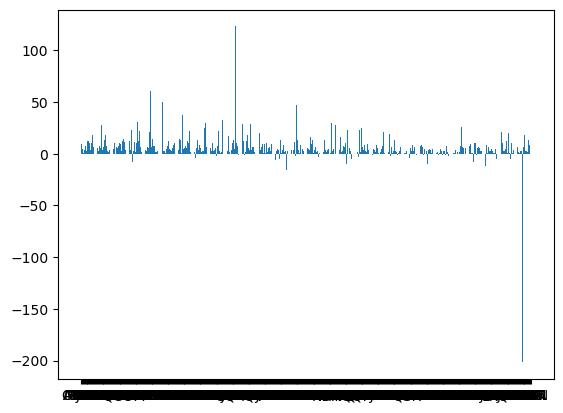

In [ ]:
bar_beps_nonull1 = plt.bar(beps_nonull['Ticker'], beps_nonull['Basic EPS (TTM)'])
bar_beps_nonull1

<AxesSubplot: xlabel='Ticker', ylabel='Basic EPS (TTM)'>

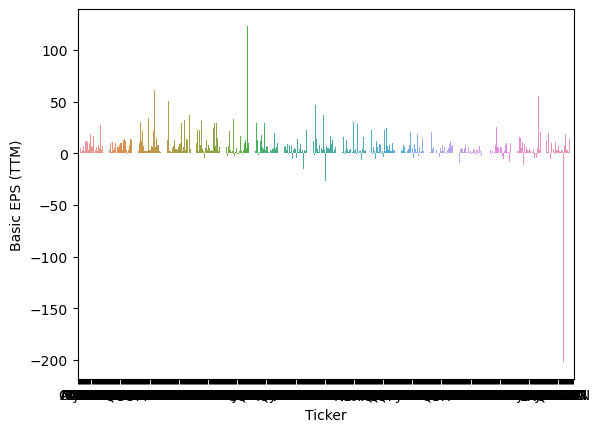

In [ ]:
#adjustments
sns.barplot(data=beps_nonull, x=beps_nonull['Ticker'], y=beps_nonull['Basic EPS (TTM)'])

In [ ]:
sector_df['Basic EPS (TTM)'] = beps['Basic EPS (TTM)']
sector_df

,Ticker,Description,Sector,Basic EPS (TTM)
0,AAPL,Apple Inc.,Electronic Technology,6.1445
1,MSFT,Microsoft Corporation,Technology Services,9.0309
2,GOOG,Alphabet Inc.,Technology Services,5.0893
3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147
4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN
...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665
496,RE,"Everest Re Group, Ltd.",Finance,13.2847
497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088
498,U,Unity Software Inc.,Technology Services,-2.6874


<seaborn.axisgrid.FacetGrid>

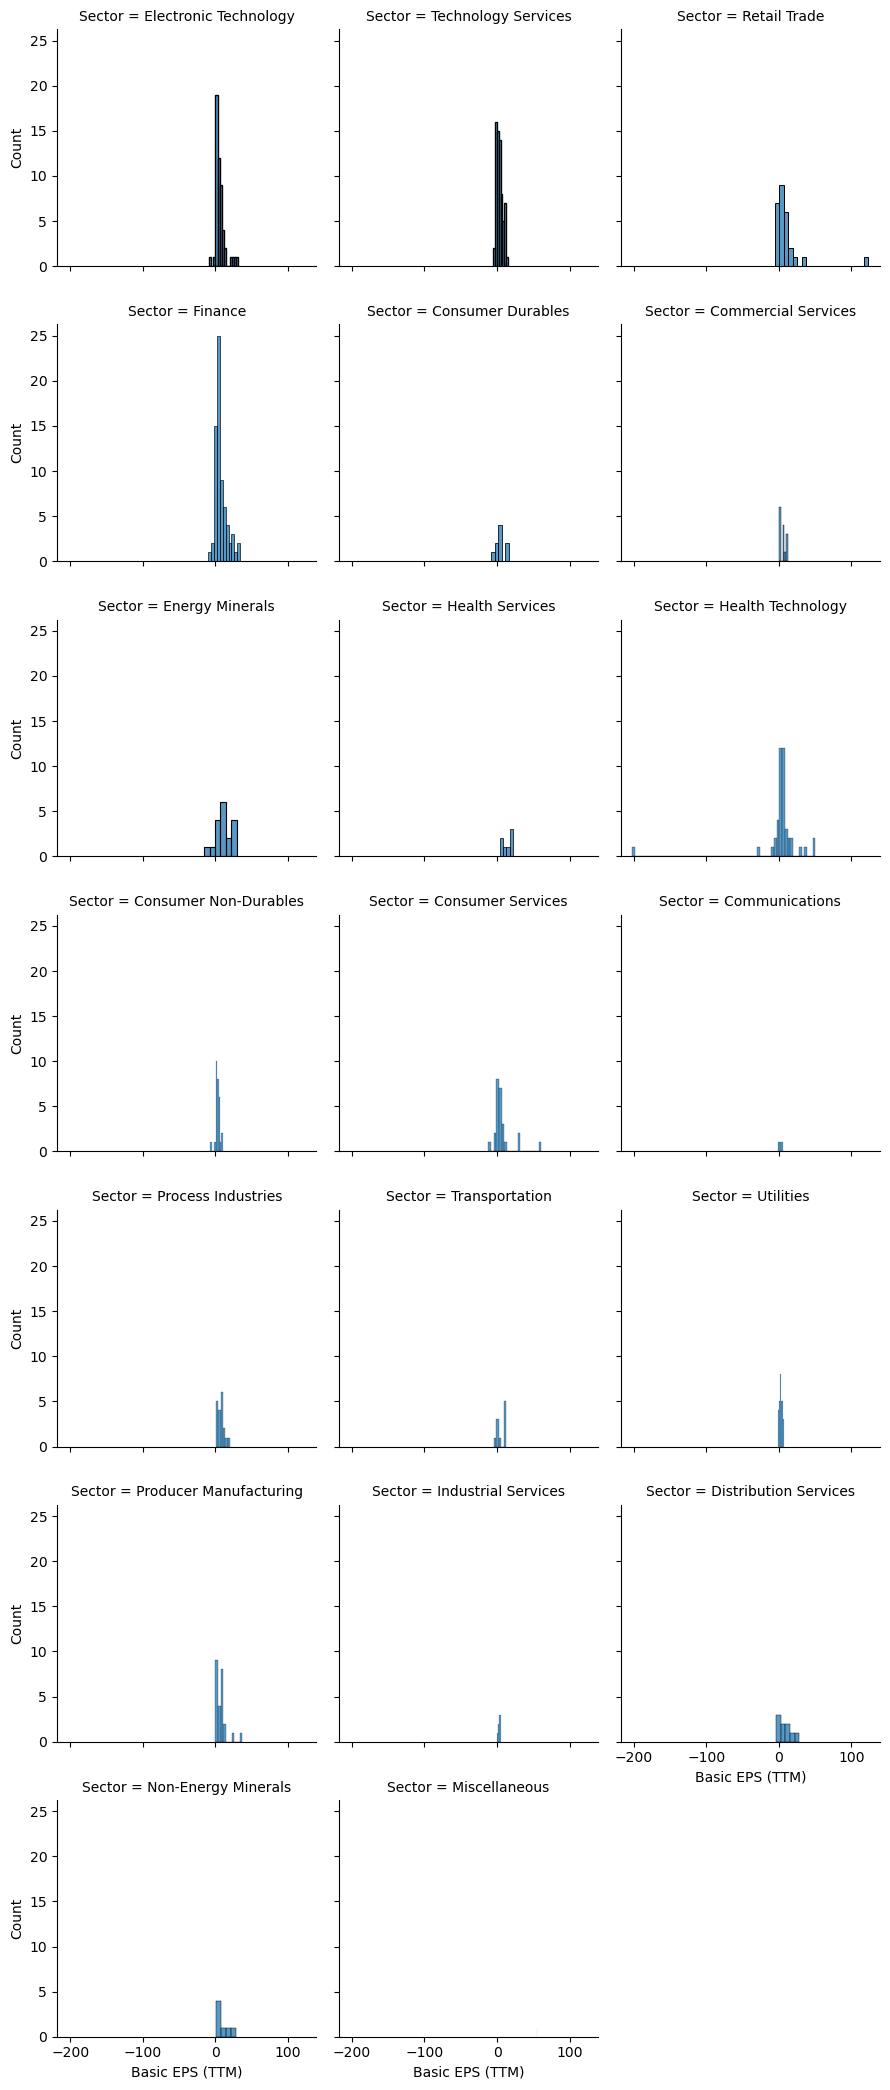

In [ ]:
g = sns.FacetGrid(sector_df, col="Sector", col_wrap=3)
g.map(sns.histplot, "Basic EPS (TTM)")

In [ ]:
sector_df['EPS Diluted (FY)'] = deps['EPS Diluted (FY)']
sector_df

,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY)
0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132
1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470
2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099
3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392
4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN,59460.0000
...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067
496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246
497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088
498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203


<seaborn.axisgrid.FacetGrid>

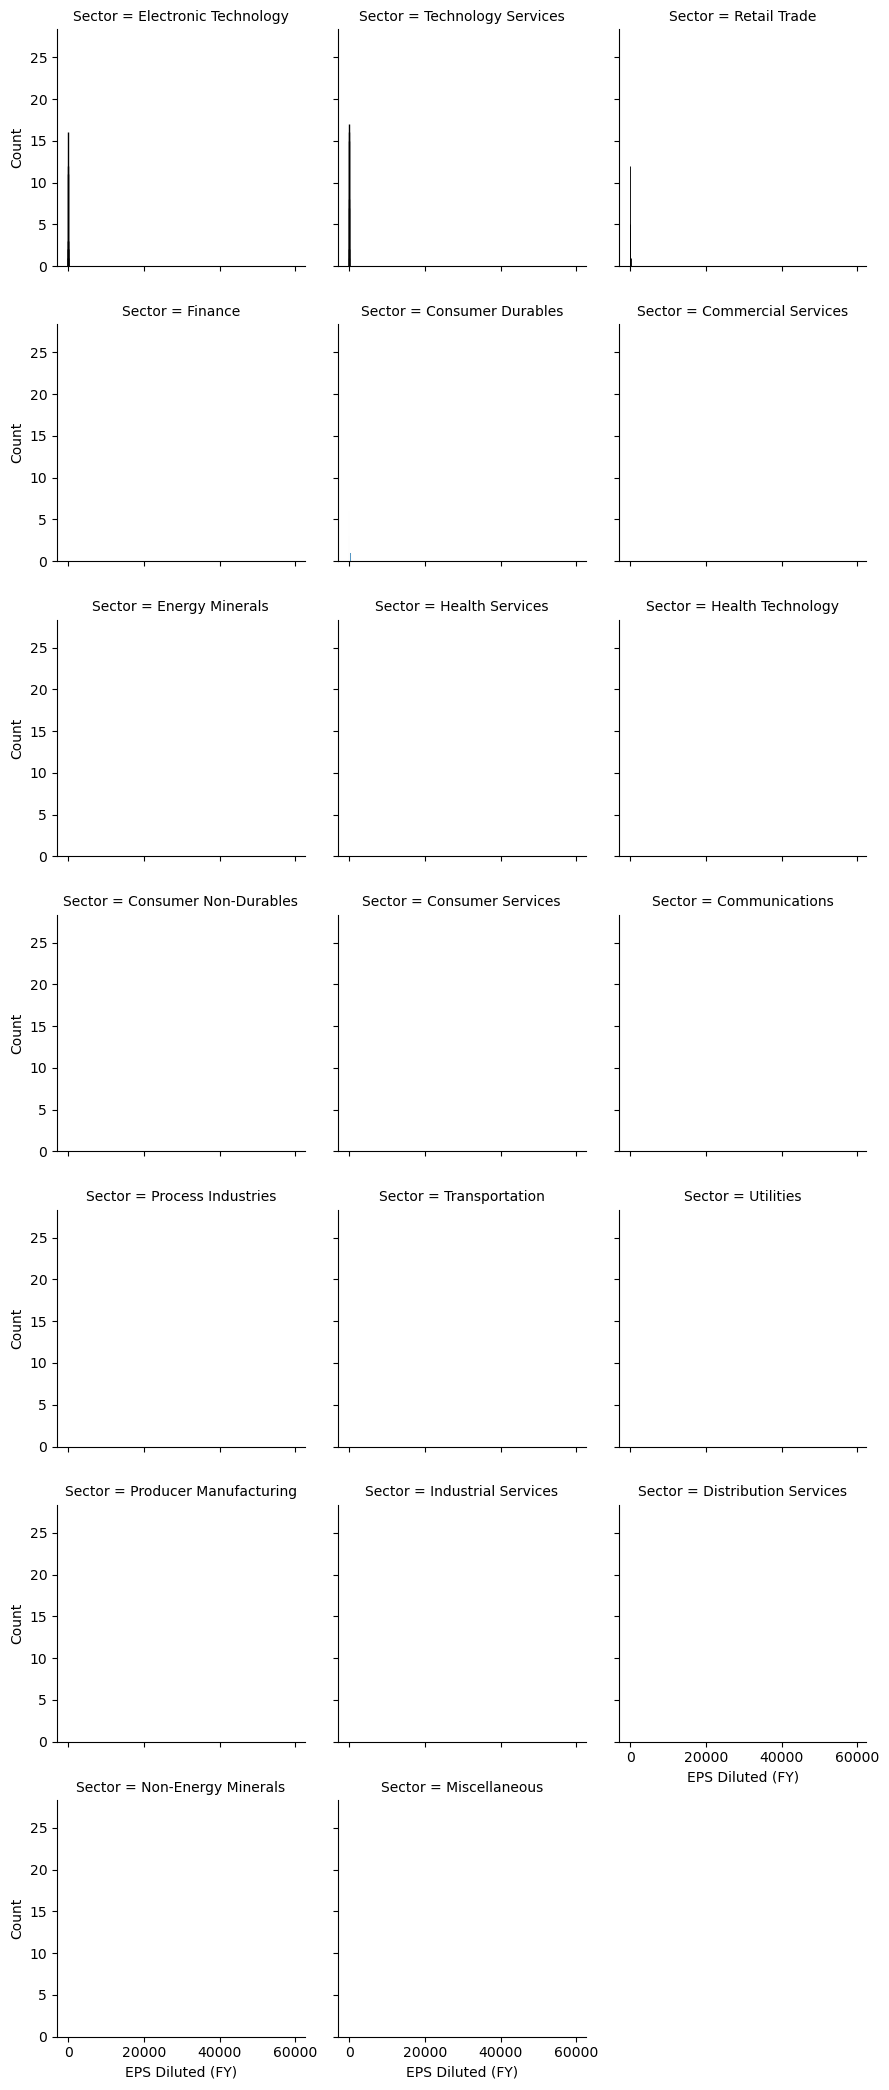

In [ ]:
z = sns.FacetGrid(sector_df, col="Sector", col_wrap=3)
z.map(sns.histplot, "EPS Diluted (FY)")

#negative values (?)

/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


<seaborn.axisgrid.FacetGrid>

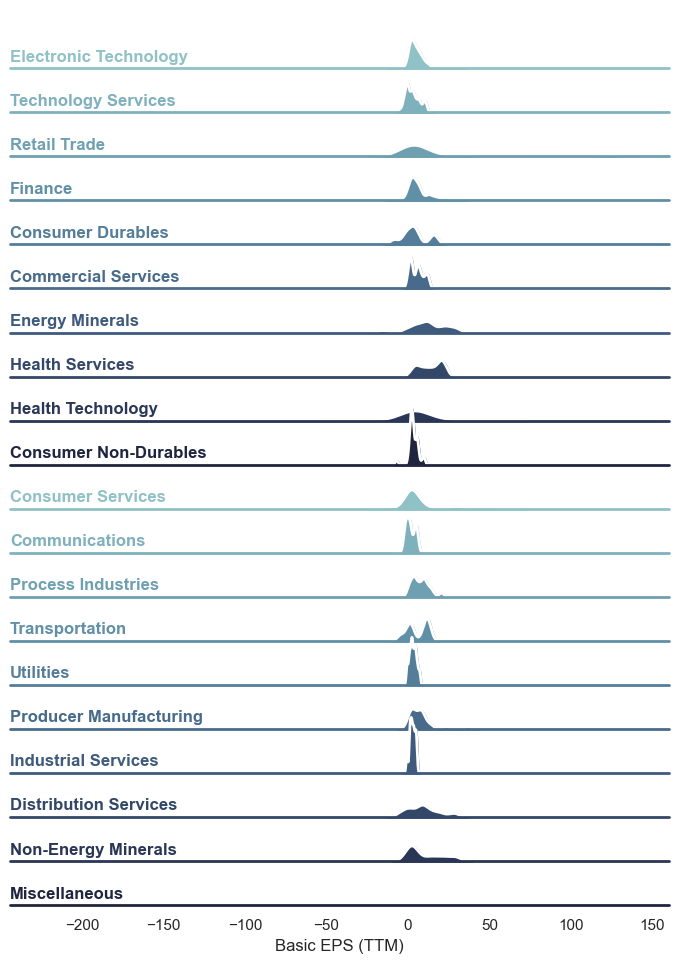

In [ ]:

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(sector_df, row="Sector", hue="Sector", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Basic EPS (TTM)",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Basic EPS (TTM)", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Basic EPS (TTM)")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:
sector_df['Price to Earnings Ratio (TTM)'] = valuation_df.head(500)['Price to Earnings Ratio (TTM)']
sector_df

,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM)
0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718
1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728
2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028
3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298
4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN,59460.0000,NaN
...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734
496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990
497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448
498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN


<seaborn.axisgrid.FacetGrid>

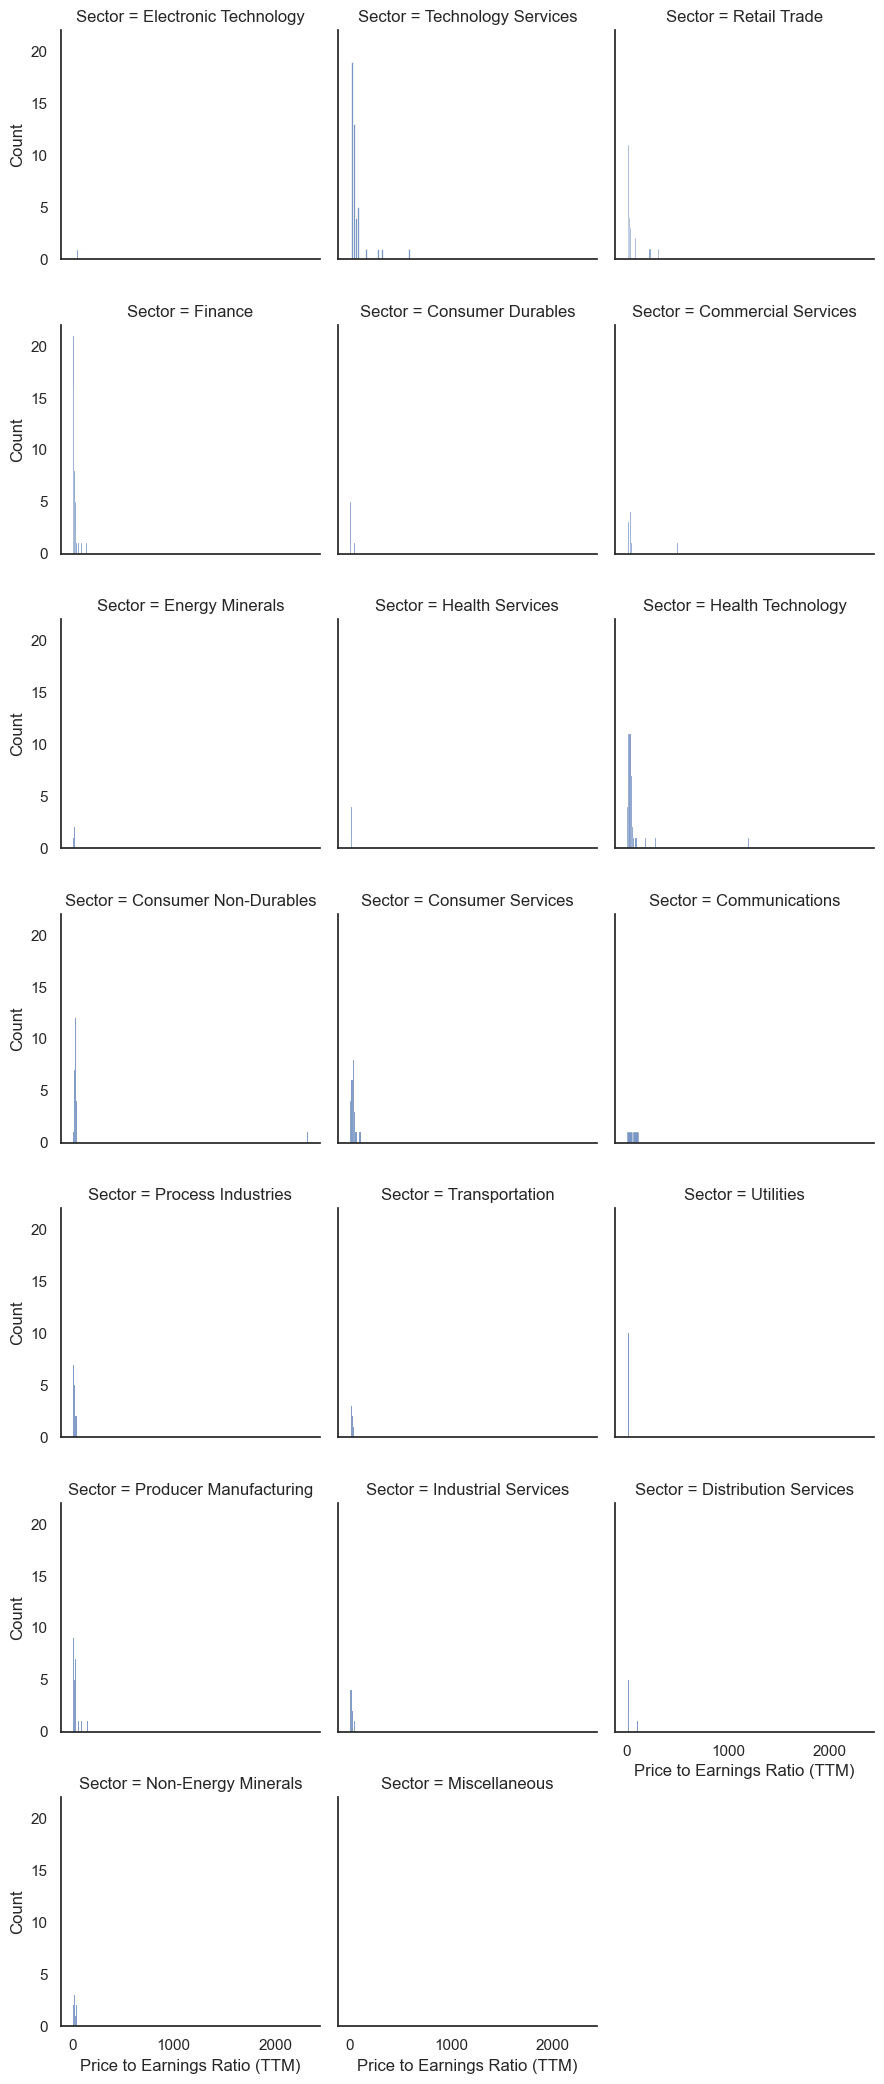

In [ ]:
k = sns.FacetGrid(sector_df, col="Sector", col_wrap=3)
k.map(sns.histplot, "Price to Earnings Ratio (TTM)")

In [ ]:
#finding out which company will give the most based on dividends per share

In [ ]:
#To calculate dividend: we have to divide annual dividends paid per share by price per share.
sector_df['Dividends per Share (FY)'] = dividends_df.head(500)['Dividends per Share (FY)']

In [ ]:
sector_df

,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY)
0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90
1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48
2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00
3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00
4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN,59460.0000,NaN,0.00
...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00
496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20
497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18
498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00


In [ ]:
sector_df.to_csv("sector_df.csv")

In [ ]:
sector_df['payout_ratio'] = sector_df['Dividends per Share (FY)'] / sector_df['Basic EPS (TTM)']
sector_df

,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY),payout_ratio
0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90,0.146472
1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48,0.274613
2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00,0.000000
3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00,0.000000
4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN,59460.0000,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00,0.000000
496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20,0.466702
497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18,0.244702
498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00,-0.000000


In [ ]:
sector_df['net_income'] = income_statement_df.head(500)['Net Income (FY)']
sector_df

,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY),payout_ratio,net_income
0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90,0.146472,9.980300e+10
1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48,0.274613,7.273800e+10
2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00,0.000000,7.603300e+10
3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00,0.000000,3.336400e+10
4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN,59460.0000,NaN,0.00,NaN,8.979500e+10
...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00,0.000000,-6.001800e+07
496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20,0.466702,1.360887e+09
497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18,0.244702,5.131030e+08
498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00,-0.000000,-5.326070e+08


In [ ]:
sector_df['dividends_to_shareholders'] = sector_df['payout_ratio'] * sector_df['net_income']
sector_df

,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY),payout_ratio,net_income,dividends_to_shareholders
0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90,0.146472,9.980300e+10,1.461839e+10
1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48,0.274613,7.273800e+10,1.997478e+10
2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00,0.000000,7.603300e+10,0.000000e+00
3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00,0.000000,3.336400e+10,0.000000e+00
4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN,59460.0000,NaN,0.00,NaN,8.979500e+10,NaN
...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00,0.000000,-6.001800e+07,-0.000000e+00
496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20,0.466702,1.360887e+09,6.351291e+08
497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18,0.244702,5.131030e+08,1.255573e+08
498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00,-0.000000,-5.326070e+08,0.000000e+00


In [ ]:
div_top = sector_df.sort_values(by='dividends_to_shareholders', ascending=False)

In [ ]:
div_top20 = div_top.head(20)
div_top20

,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY),payout_ratio,net_income,dividends_to_shareholders
228,PRU,"Prudential Financial, Inc.",Finance,0.7481,19.5053,143.949930,4.6000,6.148911,7.609000e+09,4.678706e+10
1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.4800,0.274613,7.273800e+10,1.997478e+10
0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.9000,0.146472,9.980300e+10,1.461839e+10
11,JPM,JP Morgan Chase & Co.,Finance,12.1040,12.0848,11.608975,4.0000,0.330469,3.748700e+10,1.238830e+10
15,CVX,Chevron Corporation,Energy Minerals,18.3381,18.2800,9.829860,5.6800,0.309738,3.546500e+10,1.098485e+10
39,VZ,Verizon Communications Inc.,Communications,5.0584,5.0585,8.043065,2.5850,0.511031,2.125600e+10,1.086248e+10
13,WMT,Walmart Inc.,Retail Trade,3.2509,4.8745,44.285803,2.2000,0.676736,1.367300e+10,9.253007e+09
17,PG,Procter & Gamble Company (The),Consumer Non-Durables,5.8680,5.8060,24.687390,3.5227,0.600324,1.474200e+10,8.849973e+09
23,ABBV,AbbVie Inc.,Health Technology,7.5334,6.4536,19.495942,5.3100,0.704861,1.146800e+10,8.083346e+09
44,PM,Philip Morris International Inc,Consumer Non-Durables,5.6197,5.8262,18.481707,4.9000,0.871933,9.083000e+09,7.919764e+09


<Figure size 300x700 with 0 Axes>

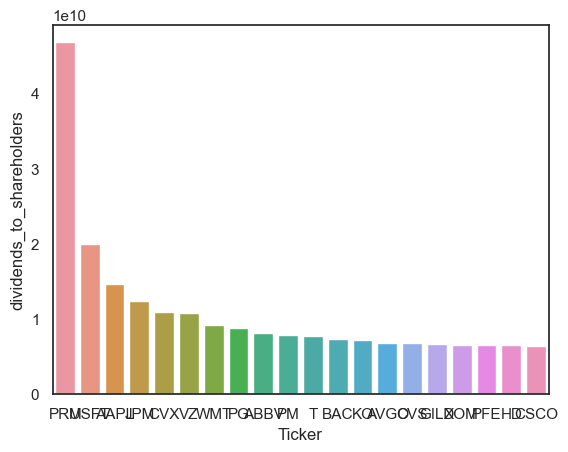

<Figure size 300x700 with 0 Axes>

In [ ]:
sns.barplot(data=div_top20, x='Ticker', y='dividends_to_shareholders')

plt.figure(figsize=(3,7))
#increase ratio width seaborn increase width of barchart

In [ ]:
data = np.array([14, 19, 20, 22, 24, 26, 27, 30, 30, 31, 36, 38, 44, 47])

#calculate interquartile range 
q3, q1 = np.percentile(data, [75 ,25])
q3

34.75

In [ ]:
beps_array=sector_df.iloc[:,3:].values
beps_array

array([[ 6.14450000e+00,  6.11320000e+00,  2.39147179e+01, ...,
         1.46472455e-01,  9.98030000e+10,  1.46183904e+10],
       [ 9.03090000e+00,  9.64700000e+00,  2.75917278e+01, ...,
         2.74612719e-01,  7.27380000e+10,  1.99747799e+10],
       [ 5.08930000e+00,  5.60990000e+00,  2.02660281e+01, ...,
         0.00000000e+00,  7.60330000e+10,  0.00000000e+00],
       ...,
       [ 8.90880000e+00,  8.80880000e+00,  2.71814479e+01, ...,
         2.44701868e-01,  5.13103000e+08,  1.25557262e+08],
       [-2.68740000e+00, -1.82030000e+00,             nan, ...,
        -0.00000000e+00, -5.32607000e+08,  0.00000000e+00],
       [ 2.65570000e+00,  2.62860000e+00,  2.05188146e+01, ...,
         6.06243175e-01,  6.74000000e+08,  4.08607900e+08]])

In [ ]:
# Cleaning the data and removing outliers

q3, q1 = np.percentile(beps_array, [75 ,25])
q3 = np.percentile(beps_array, 75)
q3

nan

In [ ]:
#calculate zscore: z = (X – μ) / σ

In [ ]:
import scipy.stats as stats
stats.zscore(beps_array)

array([[        nan, -0.04534358,         nan, ...,         nan,
        10.91803892,         nan],
       [        nan, -0.04401318,         nan, ...,         nan,
         7.84791774,         nan],
       [        nan, -0.04553306,         nan, ...,         nan,
         8.22168642,         nan],
       ...,
       [        nan, -0.04432875,         nan, ...,         nan,
        -0.34492121,         nan],
       [        nan, -0.04833037,         nan, ...,         nan,
        -0.46354144,         nan],
       [        nan, -0.04665545,         nan, ...,         nan,
        -0.32666984,         nan]])

In [ ]:
from scipy.stats import zscore
numeric_cols = sector_df.select_dtypes(include=[np.number]).columns
zscore_deps = sector_df[numeric_cols].apply(zscore)
zscore_deps = zscore_deps['EPS Diluted (FY)']
zscore_deps

0      -0.045344
1      -0.044013
2      -0.045533
3      -0.046426
4      22.337712
         ...    
495    -0.047986
496    -0.034610
497    -0.044329
498    -0.048330
499    -0.046655
Name: EPS Diluted (FY), Length: 500, dtype: float64

In [ ]:
clipped_data = zscore_deps[(-3 > zscore_deps) | (zscore_deps > 3)]
clipped_data

4    22.337712
Name: EPS Diluted (FY), dtype: float64

In [ ]:
zscore_deps.to_csv("zscoretest")

In [ ]:
zscore_deps.iloc[4:5]

4    22.337712
Name: EPS Diluted (FY), dtype: float64

In [ ]:
array_zscore = zscore_deps.values
array_zscore

array([-4.53435810e-02, -4.40131845e-02, -4.55330621e-02, -4.64255775e-02,
        2.23377118e+01, -4.70310664e-02, -4.50664935e-02, -4.61967921e-02,
       -4.56160378e-02, -3.96716451e-02, -4.51095249e-02, -4.30954075e-02,
       -4.24607416e-02, -4.58099238e-02, -4.37974629e-02, -4.07630536e-02,
       -4.53401174e-02, -4.54592349e-02, -4.17975763e-02, -4.63111660e-02,
       -4.64441002e-02, -4.57094419e-02, -4.67974621e-02, -4.52154280e-02,
       -4.61844060e-02, -3.76563982e-02, -4.67373763e-02, -4.55802724e-02,
       -4.26982236e-02, -4.03194124e-02, -4.38666594e-02, -4.65842252e-02,
       -4.69969952e-02, -4.62319928e-02, -4.61653939e-02, -4.40082903e-02,
       -4.67377528e-02, -4.36131394e-02, -4.64629241e-02, -4.57406519e-02,
       -4.71886976e-02, -4.38435061e-02, -4.70868981e-02, -4.53297266e-02,
       -4.54516300e-02, -4.48849936e-02, -4.38977941e-02, -4.41039156e-02,
       -4.64721855e-02, -4.21179587e-02, -4.53549882e-02, -4.68545737e-02,
       -4.33617653e-02, -

In [ ]:
type(array_zscore)

numpy.ndarray

In [ ]:
index = 4
a = np.delete(array_zscore, index)
a

array([-0.04534358, -0.04401318, -0.04553306, -0.04642558, -0.04703107,
       -0.04506649, -0.04619679, -0.04561604, -0.03967165, -0.04510952,
       -0.04309541, -0.04246074, -0.04580992, -0.04379746, -0.04076305,
       -0.04534012, -0.04545923, -0.04179758, -0.04631117, -0.0464441 ,
       -0.04570944, -0.04679746, -0.04521543, -0.04618441, -0.0376564 ,
       -0.04673738, -0.04558027, -0.04269822, -0.04031941, -0.04386666,
       -0.04658423, -0.046997  , -0.04623199, -0.04616539, -0.04400829,
       -0.04673775, -0.04361314, -0.04646292, -0.04574065, -0.0471887 ,
       -0.04384351, -0.0470869 , -0.04532973, -0.04545163, -0.04488499,
       -0.04389779, -0.04410392, -0.04647219, -0.04211796, -0.04535499,
       -0.04685457, -0.04336177, -0.04632739, -0.04810354, -0.04632739,
       -0.04466615, -0.04319115, -0.04377318, -0.04732758, -0.0438833 ,
       -0.03888025, -0.05076813, -0.04657865, -0.04342475, -0.0469674 ,
       -0.04311604, -0.03632815, -0.04293676, -0.03948947, -0.04

In [ ]:
dx = pd.read_csv("sector_df.csv")
dx

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY)
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00
4,4,BRK.A,Berkshire Hathaway Inc.,Finance,NaN,59460.0000,NaN,0.00
...,...,...,...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18
498,498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00


In [ ]:
dxx = dx.drop(index=dx.index[4], axis=0)
dxx

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY)
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018,1.6309,54.966785,0.00
...,...,...,...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18
498,498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00


In [ ]:
numeric_cols = dxx.select_dtypes(include=[np.number]).columns
new_zscore = dxx[numeric_cols].apply(zscore)
new_zscore = new_zscore['EPS Diluted (FY)'].values
new_zscore
#Here we see that the values now have more range and variation, and we can now take out the outliers after
#taking out the extreme outlier. 

array([-7.91286502e-02,  1.02806186e-01, -1.05040644e-01, -2.27094217e-01,
       -3.09896242e-01, -4.12362851e-02, -1.95807274e-01, -1.16387760e-01,
        6.96521884e-01, -4.71209283e-02,  2.28314349e-01,  3.15106399e-01,
       -1.42902118e-01,  1.32306628e-01,  5.47269213e-01, -7.86549956e-02,
       -9.49445939e-02,  4.05795802e-01, -2.11448171e-01, -2.29627239e-01,
       -1.29160988e-01, -2.77950301e-01, -6.16034314e-02, -1.94113444e-01,
        9.72111614e-01, -2.69733424e-01, -1.11496761e-01,  2.82630171e-01,
        6.07938184e-01,  1.22843834e-01, -2.48789655e-01, -3.05236923e-01,
       -2.00621046e-01, -1.91513492e-01,  1.03475481e-01, -2.69784909e-01,
        1.57513288e-01, -2.32201449e-01, -1.33429027e-01, -3.31452673e-01,
        1.26010111e-01, -3.17531348e-01, -7.72340319e-02, -9.39046132e-02,
       -1.64157564e-02,  1.18586091e-01,  9.03984960e-02, -2.33467960e-01,
        3.61982755e-01, -8.06886212e-02, -2.85760453e-01,  1.91889283e-01,
       -2.13667140e-01, -

In [ ]:
clipped_data2 = new_zscore[(-3 > new_zscore) | (new_zscore > 3)]
clipped_data2

array([ 3.31157902,  5.63933378,  8.69375701, 16.10599271,  6.84252964])

In [ ]:
#attach data that are outliers
dxx['deps_zscore'] = new_zscore
dxx

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY),deps_zscore
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90,-0.079129
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48,0.102806
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00,-0.105041
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00,-0.227094
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018,1.6309,54.966785,0.00,-0.309896
...,...,...,...,...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00,-0.440543
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20,1.388758
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18,0.059652
498,498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00,-0.487578


In [ ]:
#remove rows with outliers

# get indices
index = dxx[dxx['deps_zscore'] > 3].index

#drop values
new_df = dxx.drop(index)
new_df

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM),EPS Diluted (FY),Price to Earnings Ratio (TTM),Dividends per Share (FY),deps_zscore
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445,6.1132,23.914718,0.90,-0.079129
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309,9.6470,27.591728,2.48,0.102806
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893,5.6099,20.266028,0.00,-0.105041
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,3.2392,93.884298,0.00,-0.227094
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018,1.6309,54.966785,0.00,-0.309896
...,...,...,...,...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.9067,133.451734,0.00,-0.440543
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847,34.6246,26.425990,6.20,1.388758
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,8.8088,27.181448,2.18,0.059652
498,498,U,Unity Software Inc.,Technology Services,-2.6874,-1.8203,NaN,0.00,-0.487578


/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/Users/keishavalenna/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


<seaborn.axisgrid.FacetGrid>

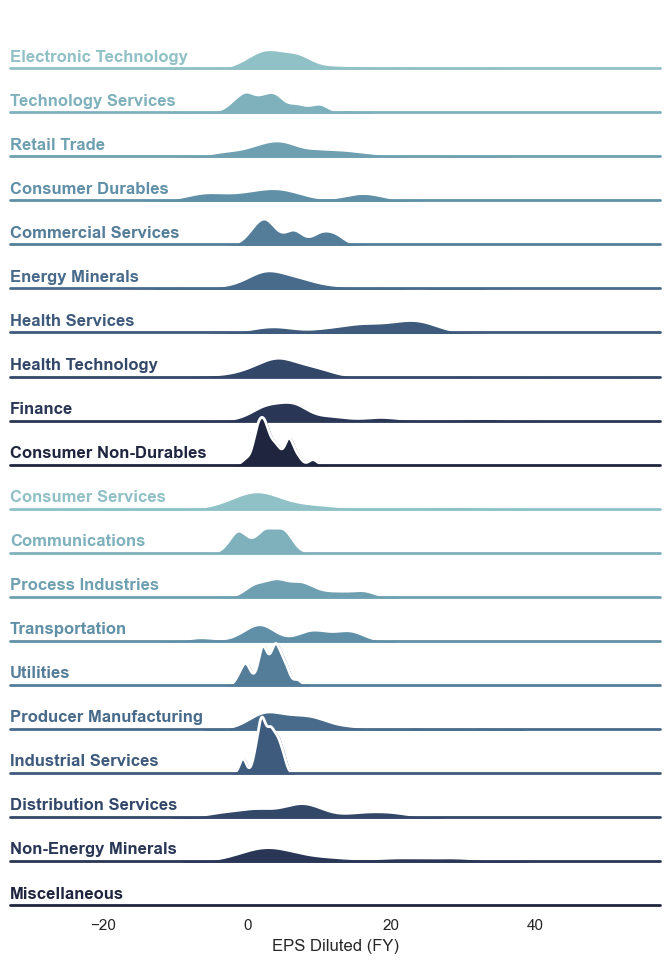

In [ ]:

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(new_df, row="Sector", hue="Sector", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "EPS Diluted (FY)",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "EPS Diluted (FY)", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "EPS Diluted (FY)")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


# g.set(xlim=(0, 45))

In [ ]:
plt.show(g)

In [ ]:
beps_arr = dx['Basic EPS (TTM)'].values
beps_arr

array([ 6.14450000e+00,  9.03090000e+00,  5.08930000e+00,  1.11470000e+00,
                   nan,  3.60180000e+00,  7.19880000e+00,  2.38170000e+00,
        1.22740000e+01,             nan,             nan,  1.21040000e+01,
        1.05709000e+01,  3.25090000e+00,  1.02557000e+01,  1.83381000e+01,
        6.67540000e+00,  5.86800000e+00,  1.66477000e+01,  3.89300000e-01,
        3.20660000e+00,  6.03260000e+00,  2.29370000e+00,  7.53340000e+00,
        5.30980000e+00,  2.74455000e+01,  3.28680000e+00,  7.02880000e+00,
        1.32594000e+01,  1.79173000e+01,  7.99300000e+00,  2.77580000e+00,
        1.72660000e+00,  3.59000000e+00,             nan,  9.79350000e+00,
        1.22700000e+00,  1.11543000e+01,  3.17030000e+00,  5.05840000e+00,
                   nan,  1.01235000e+01,  2.78700000e-01,  6.21590000e+00,
        5.61970000e+00,  7.62470000e+00,  1.01052000e+01,  9.52140000e+00,
        3.09190000e+00,  1.28308000e+01,  1.39860000e+01,             nan,
        1.15171000e+01,  

<seaborn.axisgrid.FacetGrid>

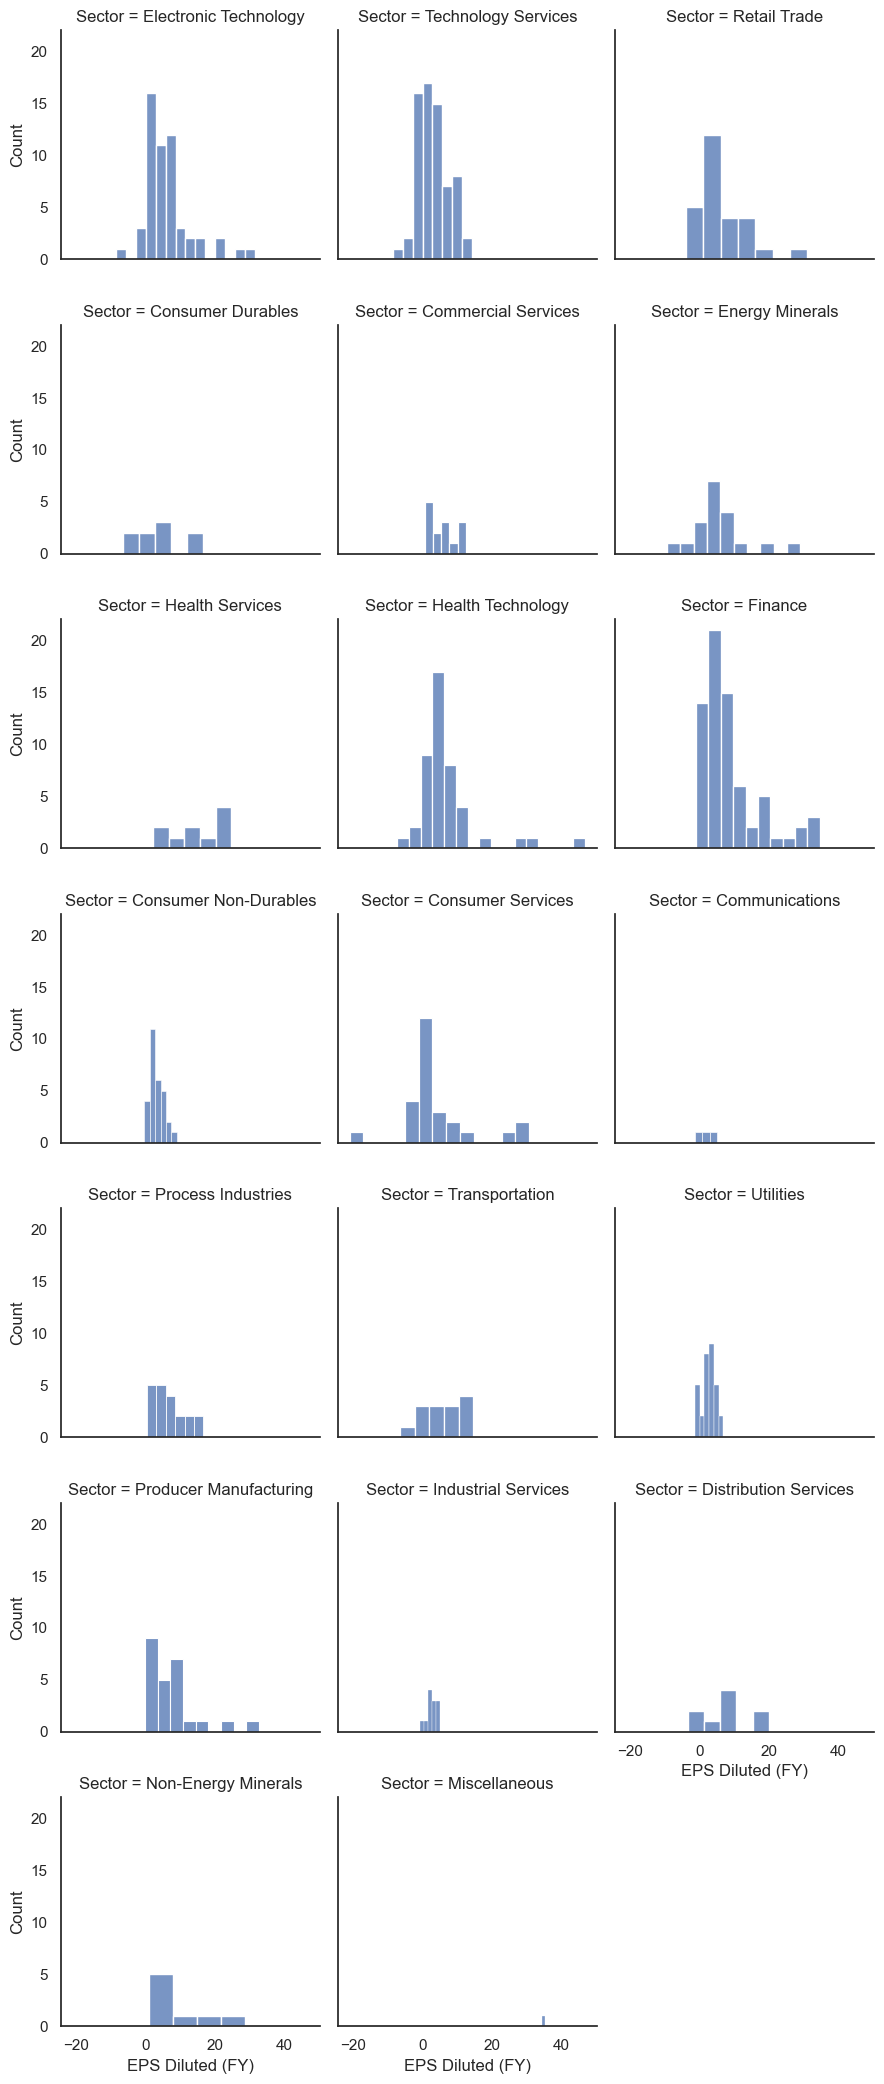

In [ ]:
y = sns.FacetGrid(new_df, col="Sector", col_wrap=3)
y.map(sns.histplot, "EPS Diluted (FY)")

In [ ]:
dxx_beps = dxx.drop(['EPS Diluted (FY)','Price to Earnings Ratio (TTM)','Dividends per Share (FY)','deps_zscore'], axis=1)
dxx_beps

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM)
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018
...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088
498,498,U,Unity Software Inc.,Technology Services,-2.6874


In [ ]:
#drop na values
dxx_beps.dropna()

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM)
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018
...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088
498,498,U,Unity Software Inc.,Technology Services,-2.6874


In [ ]:
#get zvalues for Basic EPS
num = dxx_beps.select_dtypes(include=[np.number]).columns
beps_zscore = dxx_beps[numeric_cols].apply(zscore)
beps_zscore = dxx_beps['EPS Diluted (FY)']

KeyError: "['EPS Diluted (FY)', 'Price to Earnings Ratio (TTM)', 'Dividends per Share (FY)'] not in index"

In [ ]:
dxx_beps = dxx_beps[dxx_beps['Basic EPS (TTM)'].notna()]
dxx_beps.reset_index()

,index,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM)
0,0,0,AAPL,Apple Inc.,Electronic Technology,6.1445
1,1,1,MSFT,Microsoft Corporation,Technology Services,9.0309
2,2,2,GOOG,Alphabet Inc.,Technology Services,5.0893
3,3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147
4,5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018
...,...,...,...,...,...,...
474,495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665
475,496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847
476,497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088
477,498,498,U,Unity Software Inc.,Technology Services,-2.6874


In [ ]:
bz_arr = dxx_beps['Basic EPS (TTM)'].values
bz_arr

array([ 6.14450000e+00,  9.03090000e+00,  5.08930000e+00,  1.11470000e+00,
        3.60180000e+00,  7.19880000e+00,  2.38170000e+00,  1.22740000e+01,
        1.21040000e+01,  1.05709000e+01,  3.25090000e+00,  1.02557000e+01,
        1.83381000e+01,  6.67540000e+00,  5.86800000e+00,  1.66477000e+01,
        3.89300000e-01,  3.20660000e+00,  6.03260000e+00,  2.29370000e+00,
        7.53340000e+00,  5.30980000e+00,  2.74455000e+01,  3.28680000e+00,
        7.02880000e+00,  1.32594000e+01,  1.79173000e+01,  7.99300000e+00,
        2.77580000e+00,  1.72660000e+00,  3.59000000e+00,  9.79350000e+00,
        1.22700000e+00,  1.11543000e+01,  3.17030000e+00,  5.05840000e+00,
        1.01235000e+01,  2.78700000e-01,  6.21590000e+00,  5.61970000e+00,
        7.62470000e+00,  1.01052000e+01,  9.52140000e+00,  3.09190000e+00,
        1.28308000e+01,  1.39860000e+01,  1.15171000e+01,  3.52440000e+00,
       -1.22240000e+00,  3.52140000e+00,  7.89040000e+00,  1.38493000e+01,
        1.25397000e+01,  

In [ ]:
zscore_beps = stats.zscore(bz_arr)
zscore_beps

array([ 7.26382046e-03,  2.14666301e-01, -6.85576516e-02, -3.54152821e-01,
       -1.75442071e-01,  8.30206230e-02, -2.63112445e-01,  4.47699485e-01,
        4.35484123e-01,  3.25323112e-01, -2.00656016e-01,  3.02674393e-01,
        8.83435828e-01,  4.54116782e-02, -1.26041070e-02,  7.61972014e-01,
       -4.06276491e-01, -2.03839196e-01, -7.76762111e-04, -2.69435691e-01,
        1.07063330e-01, -5.27136082e-02,  1.53784871e+00, -1.98076419e-01,
        7.08052607e-02,  5.18505473e-01,  8.53199213e-01,  1.40087921e-01,
       -2.34794361e-01, -3.10184703e-01, -1.76289961e-01,  2.69462979e-01,
       -3.46083497e-01,  3.67243361e-01, -2.06447535e-01, -7.07779734e-02,
        2.93175152e-01, -4.14223662e-01,  1.23942726e-02, -3.04457214e-02,
        1.13623698e-01,  2.91860205e-01,  2.49911213e-01, -2.12080973e-01,
        4.87708389e-01,  5.70715368e-01,  3.93312381e-01, -1.81003654e-01,
       -5.22085310e-01, -1.81219219e-01,  1.32715591e-01,  5.60892780e-01,
        4.66791378e-01, -

In [ ]:
dxx_beps['zscore BEPS'] = zscore_beps
dxx_beps

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM),zscore BEPS
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445,0.007264
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309,0.214666
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893,-0.068558
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,-0.354153
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018,-0.175442
...,...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.328874
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847,0.520323
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,0.205893
498,498,U,Unity Software Inc.,Technology Services,-2.6874,-0.627353


In [ ]:
clip = zscore_beps[(-3 > zscore_beps) | (zscore_beps > 3)]
clip

array([  3.96355379,   3.18069278,   8.41228813,   3.52176725,
       -14.93512777])

In [ ]:
# ind = dxx_beps[dxx_beps['zscore BEPS'] > 3].index
ind2 = dxx_beps[dxx_beps['zscore BEPS'] < -10].index
ind2

Int64Index([490], dtype='int64')

In [ ]:
dxx_beps2 = dxx_beps.drop(ind2)
dxx_beps2

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM),zscore BEPS
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445,0.007264
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309,0.214666
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893,-0.068558
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,-0.354153
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018,-0.175442
...,...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.328874
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847,0.520323
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,0.205893
498,498,U,Unity Software Inc.,Technology Services,-2.6874,-0.627353


In [ ]:
ind = dxx_beps[dxx_beps['zscore BEPS'] > 3].index
ind

Int64Index([82, 96, 178, 465], dtype='int64')

In [ ]:
dxx_beps3 = dxx_beps2.drop(ind)
dxx_beps3 #cleaned 

,Unnamed: 0,Ticker,Description,Sector,Basic EPS (TTM),zscore BEPS
0,0,AAPL,Apple Inc.,Electronic Technology,6.1445,0.007264
1,1,MSFT,Microsoft Corporation,Technology Services,9.0309,0.214666
2,2,GOOG,Alphabet Inc.,Technology Services,5.0893,-0.068558
3,3,AMZN,"Amazon.com, Inc.",Retail Trade,1.1147,-0.354153
5,5,TSLA,"Tesla, Inc.",Consumer Durables,3.6018,-0.175442
...,...,...,...,...,...,...
495,495,AXON,"Axon Enterprise, Inc.",Electronic Technology,1.4665,-0.328874
496,496,RE,"Everest Re Group, Ltd.",Finance,13.2847,0.520323
497,497,NDSN,Nordson Corporation,Producer Manufacturing,8.9088,0.205893
498,498,U,Unity Software Inc.,Technology Services,-2.6874,-0.627353


<seaborn.axisgrid.FacetGrid>

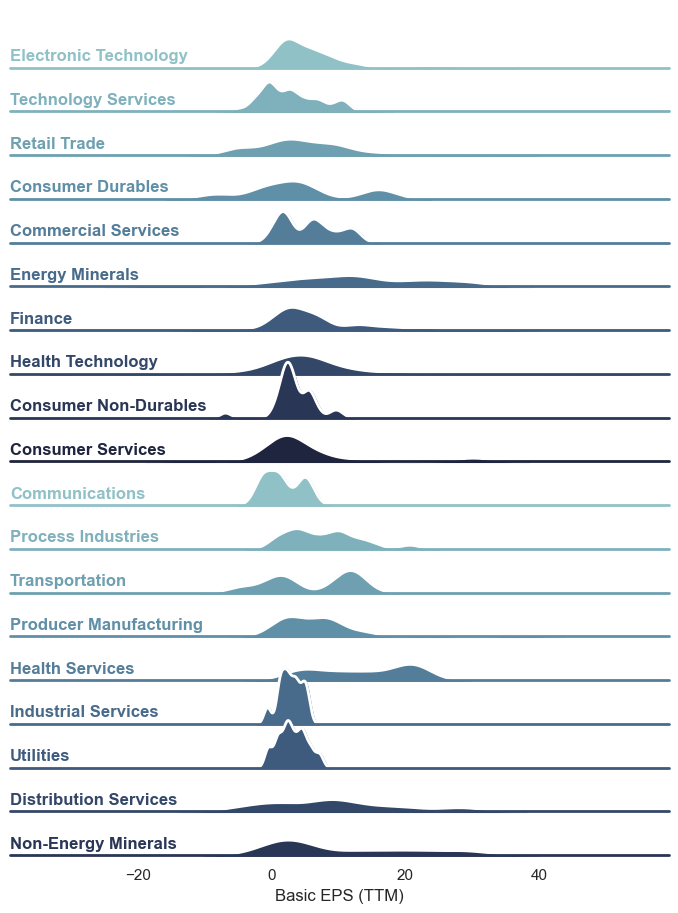

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dxx_beps3, row="Sector", hue="Sector", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Basic EPS (TTM)",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Basic EPS (TTM)", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Basic EPS (TTM)")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# g.set(xlim=(0, 45))

In [ ]:
 print(pd.unique(dxx_beps3['Sector']))

['Electronic Technology' 'Technology Services' 'Retail Trade'
 'Consumer Durables' 'Commercial Services' 'Energy Minerals' 'Finance'
 'Health Technology' 'Consumer Non-Durables' 'Consumer Services'
 'Communications' 'Process Industries' 'Transportation'
 'Producer Manufacturing' 'Health Services' 'Industrial Services'
 'Utilities' 'Distribution Services' 'Non-Energy Minerals']


In [ ]:
insval_df = balance_sheet_df
insval_df = insval_df.drop(['Current Ratio (MRQ)','Debt to Equity Ratio (MRQ)','Net Debt (MRQ)','Quick Ratio (MRQ)'],axis=1)
insval_df['Price'] = valuation_df['Price']
insval_df

,Ticker,Description,Total Assets (MRQ),Total Debt (MRQ),Total Current Assets (MRQ),Price
0,AAPL,Apple Inc.,3.527550e+11,1.324800e+11,1.354050e+11,143.0000
1,MSFT,Microsoft Corporation,3.645520e+11,7.798500e+10,1.578230e+11,242.7100
2,GOOG,Alphabet Inc.,3.582550e+11,2.933600e+10,1.661090e+11,97.9500
3,AMZN,"Amazon.com, Inc.",4.283620e+11,1.445800e+11,1.314630e+11,100.5500
4,BRK.A,Berkshire Hathaway Inc.,9.022960e+11,1.226610e+11,2.015220e+11,465039.9800
...,...,...,...,...,...,...
8110,FAZ,Direxion Financial Bear 3X Shares,NaN,NaN,NaN,27.3819
8111,EMBD,Global X Emerging Markets Bond ETF,NaN,NaN,NaN,35.4100
8112,AVIV,Avantis International Large Cap Value ETF,NaN,NaN,NaN,70.7600
8113,DFNV,Donoghue Forlines Risk Managed Innovation ETF,NaN,NaN,NaN,49.6114


In [ ]:
insval_df['Assets (TATC)'] = insval_df['Total Assets (MRQ)']+ insval_df['Total Current Assets (MRQ)']
insval_df = insval_df.drop(['Total Assets (MRQ)','Total Current Assets (MRQ)'], axis=1)
insval_df = insval_df.dropna()
insval_df.reset_index()

,index,Ticker,Description,Total Debt (MRQ),Price,Assets (TATC)
0,0,AAPL,Apple Inc.,1.324800e+11,143.0000,4.881600e+11
1,1,MSFT,Microsoft Corporation,7.798500e+10,242.7100,5.223750e+11
2,2,GOOG,Alphabet Inc.,2.933600e+10,97.9500,5.243640e+11
3,3,AMZN,"Amazon.com, Inc.",1.445800e+11,100.5500,5.598250e+11
4,4,BRK.A,Berkshire Hathaway Inc.,1.226610e+11,465039.9800,1.103818e+12
...,...,...,...,...,...,...
4921,5173,GROM,Grom Social Enterprises Inc.,1.110101e+06,2.0300,3.634554e+07
4922,5174,BXRX,"Baudax Bio, Inc.",8.714000e+06,3.0100,2.877900e+07
4923,5175,BRSH,Bruush Oral Care Inc.,4.477104e+06,0.3849,1.073307e+06
4924,5176,PBLA,"Panbela Therapeutics, Inc.",6.844000e+06,1.5300,6.633000e+06


In [ ]:
#Book Value of Equity
insval_df['Book Value of Equity'] = insval_df['Assets (TATC)'] / insval_df['Total Debt (MRQ)']
insval_df

,Ticker,Description,Total Debt (MRQ),Price,Assets (TATC),Book Value of Equity
0,AAPL,Apple Inc.,1.324800e+11,143.0000,4.881600e+11,3.684783
1,MSFT,Microsoft Corporation,7.798500e+10,242.7100,5.223750e+11,6.698404
2,GOOG,Alphabet Inc.,2.933600e+10,97.9500,5.243640e+11,17.874421
3,AMZN,"Amazon.com, Inc.",1.445800e+11,100.5500,5.598250e+11,3.872078
4,BRK.A,Berkshire Hathaway Inc.,1.226610e+11,465039.9800,1.103818e+12,8.998932
...,...,...,...,...,...,...
5173,GROM,Grom Social Enterprises Inc.,1.110101e+06,2.0300,3.634554e+07,32.740754
5174,BXRX,"Baudax Bio, Inc.",8.714000e+06,3.0100,2.877900e+07,3.302616
5175,BRSH,Bruush Oral Care Inc.,4.477104e+06,0.3849,1.073307e+06,0.239732
5176,PBLA,"Panbela Therapeutics, Inc.",6.844000e+06,1.5300,6.633000e+06,0.969170


In [ ]:
insval_df = insval_df.head(500)
insval_df = insval_df.sort_values("Book Value of Equity")
insval_df.reset_index()
#remove inf (bottom 3)
insval_df = insval_df.head(497)
insval_df = insval_df.reset_index()
insval_df
#this is where we use the algorithm to compare & contrast best price for book value

,level_0,index,Ticker,Description,Total Debt (MRQ),Price,Assets (TATC),Book Value of Equity
0,0,524,DPZ,Domino's Pizza Inc,5.384150e+09,348.49,2.472807e+09,0.459275
1,1,238,YUM,"Yum! Brands, Inc.",1.158900e+10,129.04,7.374000e+09,0.636293
2,2,189,LVS,Las Vegas Sands Corp.,1.595000e+10,57.88,1.262000e+10,0.791223
3,3,445,FICO,Fair Isaac Corporation,1.971426e+09,644.28,1.942515e+09,0.985335
4,4,338,SIRI,Sirius XM Holdings Inc.,1.015900e+10,5.87,1.109100e+10,1.091741
...,...,...,...,...,...,...,...,...
492,492,389,INCY,Incyte Corporation,4.208000e+07,83.65,9.331325e+09,221.752020
493,493,229,ANET,"Arista Networks, Inc.",4.706700e+07,123.84,1.119369e+10,237.824548
494,494,420,TW,Tradeweb Markets Inc.,2.866800e+07,74.38,7.424099e+09,258.968153
495,495,149,MNST,Monster Beverage Corporation,4.355800e+07,102.37,1.290150e+10,296.191193


In [ ]:
#best stocks money can buy based on book value
insval_df_top = insval_df.tail(10)
insval_df_top

,level_0,index,Ticker,Description,Total Debt (MRQ),Price,Assets (TATC),Book Value of Equity
487,487,302,VEEV,Veeva Systems Inc.,61890000.0,170.54,7.569202e+09,122.300889
488,488,350,ZM,"Zoom Video Communications, Inc.",99856000.0,73.50,1.375740e+10,137.772432
489,489,244,BNTX,BioNTech SE,268424100.0,140.49,4.296392e+10,160.059854
490,490,383,PAYC,"Paycom Software, Inc.",29000000.0,315.76,5.452100e+09,188.003448
491,491,495,AXON,"Axon Enterprise, Inc.",16311000.0,191.46,3.216129e+09,197.175464
492,492,389,INCY,Incyte Corporation,42080000.0,83.65,9.331325e+09,221.752020
493,493,229,ANET,"Arista Networks, Inc.",47067000.0,123.84,1.119369e+10,237.824548
494,494,420,TW,Tradeweb Markets Inc.,28668000.0,74.38,7.424099e+09,258.968153
495,495,149,MNST,Monster Beverage Corporation,43558000.0,102.37,1.290150e+10,296.191193
496,496,380,MPWR,"Monolithic Power Systems, Inc.",4140000.0,407.62,3.254678e+09,786.154106


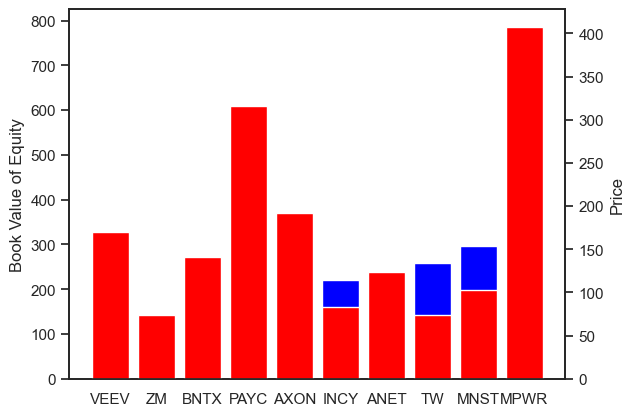

In [ ]:
#creating figure
fig, ax1 = plt.subplots()

x = insval_df_top['Ticker']
y1 = insval_df_top['Book Value of Equity']
y2 = insval_df_top['Price']

# plot line chart on axis #1
ax1.bar(x, y1, color='blue') 
ax1.set_ylabel('Book Value of Equity')
# ax1.set_ylim(0, 25)
# ax1.legend(['average_temp'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.bar(x, y2, color='red') #, width=0.5, alpha=0.5, color='orange')
# ax2.grid(False) # turn off grid #2
ax2.set_ylabel('Price')
# ax2.set_ylim(0, 90)
# ax2.legend(['average_percipitation_mm'], loc="upper right")
plt.show()

In [ ]:
valuation_df.head(500)

,Ticker,Description,Price,Market Capitalization,Price to Earnings Ratio (TTM),Price to Revenue Ratio (TTM),Basic EPS (TTM),EPS Diluted (FY),Enterprise Value/EBITDA (TTM),Enterprise Value (MRQ),Total Shares Outstanding
0,AAPL,Apple Inc.,143.00,2.264578e+12,23.914718,5.965003,6.1445,6.1132,18.347909,2.508880e+12,1.583620e+10
1,MSFT,Microsoft Corporation,242.71,1.806686e+12,27.591728,9.086498,9.0309,9.6470,18.821003,1.770650e+12,7.443800e+09
2,GOOG,Alphabet Inc.,97.95,1.258830e+12,20.266028,5.017950,5.0893,5.6099,13.089813,1.257450e+12,1.294300e+10
3,AMZN,"Amazon.com, Inc.",100.55,1.025776e+12,93.884298,2.103266,1.1147,3.2392,21.673755,1.253090e+12,1.020170e+10
4,BRK.A,Berkshire Hathaway Inc.,465039.98,6.758335e+11,NaN,2.331462,-1194.0000,59460.0000,13.226936,6.182900e+11,1.464813e+06
...,...,...,...,...,...,...,...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",191.46,1.362532e+10,133.451734,12.970778,1.4665,-0.9067,180.159705,8.031860e+09,7.116540e+07
496,RE,"Everest Re Group, Ltd.",346.92,1.358713e+10,26.425990,1.142070,13.2847,34.6246,NaN,1.326670e+10,3.916500e+07
497,NDSN,Nordson Corporation,235.97,1.348730e+10,27.181448,5.348165,8.9088,8.8088,17.937099,1.370720e+10,5.715680e+07
498,U,Unity Software Inc.,33.43,1.347360e+10,NaN,8.641483,-2.6874,-1.8203,NaN,9.653050e+09,4.030390e+08


In [ ]:
perat_df = valuation_df.head(500)
perat_df = perat_df.drop(['Market Capitalization','Price to Revenue Ratio (TTM)','Basic EPS (TTM)','EPS Diluted (FY)','Enterprise Value/EBITDA (TTM)','Enterprise Value (MRQ)','Total Shares Outstanding'],axis=1)
perat_df['Price'] = valuation_df['Price']
perat_df

,Ticker,Description,Price,Price to Earnings Ratio (TTM)
0,AAPL,Apple Inc.,143.00,23.914718
1,MSFT,Microsoft Corporation,242.71,27.591728
2,GOOG,Alphabet Inc.,97.95,20.266028
3,AMZN,"Amazon.com, Inc.",100.55,93.884298
4,BRK.A,Berkshire Hathaway Inc.,465039.98,NaN
...,...,...,...,...
495,AXON,"Axon Enterprise, Inc.",191.46,133.451734
496,RE,"Everest Re Group, Ltd.",346.92,26.425990
497,NDSN,Nordson Corporation,235.97,27.181448
498,U,Unity Software Inc.,33.43,NaN


In [ ]:
perat_df = perat_df.dropna()
perat_df = perat_df.sort_values('Price to Earnings Ratio (TTM)')
perat_df.reset_index()

,index,Ticker,Description,Price,Price to Earnings Ratio (TTM)
0,492,CRBG,Corebridge Financial Inc.,21.39,1.176406
1,244,BNTX,BioNTech SE,140.49,3.207505
2,170,AIG,"American International Group, Inc. New",63.17,3.787181
3,482,APA,APA Corporation,44.16,4.368468
4,337,PFG,Principal Financial Group Inc,93.39,4.512850
...,...,...,...,...,...
431,419,PINS,"Pinterest, Inc.",25.92,323.728814
432,280,GPN,Global Payments Inc.,110.29,503.169643
433,42,CRM,"Salesforce, Inc.",164.75,592.864865
434,371,PODD,Insulet Corporation,286.20,1206.168145


In [ ]:
bestpe = perat_df.tail(5)
bestpe

,Ticker,Description,Price,Price to Earnings Ratio (TTM)
419,PINS,"Pinterest, Inc.",25.92,323.728814
280,GPN,Global Payments Inc.,110.29,503.169643
42,CRM,"Salesforce, Inc.",164.75,592.864865
371,PODD,Insulet Corporation,286.20,1206.168145
200,STZ,"Constellation Brands, Inc.",226.36,2325.101626


In [ ]:
fig2 = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

perat_df.plot(kind='bar', x='Ticker', y 'Price', color='red', ax=ax, width=width, position=1)
perat_df.plot(kind='bar', x='Ticker', y 'Price to Earnings Ratio (TTM)', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()

SyntaxError: positional argument follows keyword argument (2087036464.py, line 8)

In [ ]:
perat_df.plot(kind='bar', x='Ticker', y 'Price')

SyntaxError: positional argument follows keyword argument (415511125.py, line 1)

In [ ]:
badpe = perat_df.head(5)
badpe

,Ticker,Description,Price,Price to Earnings Ratio (TTM)
492,CRBG,Corebridge Financial Inc.,21.39,1.176406
244,BNTX,BioNTech SE,140.49,3.207505
170,AIG,"American International Group, Inc. New",63.17,3.787181
482,APA,APA Corporation,44.16,4.368468
337,PFG,Principal Financial Group Inc,93.39,4.512850
